<a href="https://colab.research.google.com/github/LaisStefanieDiasPereira/Cases_Data_Analytics/blob/main/Cases_Data_Analytics/Analise_exportacao_vinhos_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Exportação de Vinhos Brasileiros

Este notebook apresenta uma análise da exportação de **Espumantes** e **Vinhos de Mesa** nos últimos 15 anos, com base nos dados da Embrapa (Vitibrasil).

Inclui:
- Quantidade exportada por país (em litros),
- Valor total em dólares (US$),
- Preço médio por litro,
- Representatividade dos 5 maiores destinos,
- Análise combinada de ambos os tipos de vinho.


In [61]:
from google.colab import drive
drive.mount('/content/drive') #usado para acessar a conta no google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd

# Caminhos dos arquivos
caminho_espumante = "/content/drive/MyDrive/FIAP/BASES_FASE_1/Exportacao/Exportacao - Espumante.csv"
caminho_vinho_mesa = "/content/drive/MyDrive/FIAP/BASES_FASE_1/Exportacao/Exportacao - Vinho de Mesa.csv"

# Leitura dos arquivos
df_espumante = pd.read_csv(caminho_espumante, sep="\t",encoding="utf-8",thousands=".", decimal=",", on_bad_lines='skip', engine="python")
df_vinho_mesa = pd.read_csv(caminho_vinho_mesa, sep="\t",encoding="utf-8",thousands=".", decimal=",", on_bad_lines='skip', engine="python")

# Visualizar primeiras linhas para entender estrutura
df_espumante.head(), df_vinho_mesa.head()

(   Id                 País  1970  1970.1  1971  1971.1  1972  1972.1  1973  \
 0   1        África do Sul     0       0     0       0     0       0     0   
 1   2             Alemanha     0       0     0       0     0       0     0   
 2   3               Angola     0       0     0       0     0       0     0   
 3   4    Antigua e Barbuda     0       0     0       0     0       0     0   
 4   5  Antilhas Holandesas     0       0     0       0     0       0     0   
 
    1973.1  ...  2020  2020.1  2021  2021.1   2022  2022.1   2023  2023.1  \
 0       0  ...     0       0     0       0      0       0      2      44   
 1       0  ...  2388   14767   142     265   1164    6560    162    1542   
 2       0  ...    24      38     0       0  26383  141588  56242  315073   
 3       0  ...    32     328    10      82     65     146     24     100   
 4       0  ...     0       0     0       0      0       0      0       0   
 
     2024  2024.1  
 0     78    1353  
 1  22542   77981  


In [63]:
df_espumante.columns

Index(['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1',
       '1973', '1973.1',
       ...
       '2020', '2020.1', '2021', '2021.1', '2022', '2022.1', '2023', '2023.1',
       '2024', '2024.1'],
      dtype='object', length=112)

In [64]:
df_espumante['País'].unique()

array(['África do Sul', 'Alemanha', 'Angola', 'Antigua e Barbuda',
       'Antilhas Holandesas', 'Argentina', 'Aruba', 'Australia',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belgica', 'Benin',
       'Bermudas', 'Bolívia', 'Bósnia-Herzegovina', 'Bulgaria',
       'Cabo Verde', 'Camarões', 'Canada', 'Catar', 'Cayman, Ilhas',
       'Chile', 'China', 'Chipre', 'Cingapura', 'Colombia',
       'Coreia do Sul, Republica da', 'Costa Rica', 'Cuba', 'Curaçao',
       'Dinamarca', 'Djibuti', 'Dominica', 'El Salvador',
       'Emirados Arabes Unidos', 'Equador', 'Espanha', 'Estados Unidos',
       'Estonia', 'Falkland (Malvinas)', 'Filipinas', 'Filânldia',
       'França', 'Gana', 'Gibraltar', 'Granada', 'Grécia', 'Guatemala',
       'Guiana', 'Guiné Equatorial', 'Guiné-Bissau', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungria', 'Ilha de Man', 'Índia', 'Iraque',
       'Irlanda', 'Islândia', 'Itália', 'Japão', 'Jordânia', 'Letônia',
       'Líbano', 'Libéria', 'Luxemburgo', 'Maldivas', 'Malt

In [65]:
df_vinho_mesa.columns

Index(['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1',
       '1973', '1973.1',
       ...
       '2020', '2020.1', '2021', '2021.1', '2022', '2022.1', '2023', '2023.1',
       '2024', '2024.1'],
      dtype='object', length=112)

In [66]:
df_vinho_mesa['País'].unique()

array(['Afeganistão', 'África do Sul', 'Alemanha, República Democrática',
       'Angola', 'Anguilla', 'Antígua e Barbuda', 'Antilhas Holandesas',
       'Arábia Saudita', 'Argélia', 'Argentina', 'Aruba', 'Austrália',
       'Áustria', 'Bahamas', 'Bangladesh', 'Barbados', 'Barein',
       'Bélgica', 'Belice', 'Benin', 'Bermudas', 'Bolívia',
       'Bósnia-Herzegovina', 'Brasil', 'Bulgária', 'Cabo Verde',
       'Camarões', 'Canadá', 'Catar', 'Cayman, Ilhas', 'Chile', 'China',
       'Chipre', 'Cingapura', 'Cocos (Keeling), Ilhas', 'Colômbia',
       'Comores', 'Congo', 'Coreia, Republica Sul', 'Costa do Marfim',
       'Costa Rica', 'Coveite (Kuweit)', 'Croácia', 'Cuba', 'Curaçao',
       'Dinamarca', 'Dominica', 'El Salvador', 'Emirados Arabes Unidos',
       'Equador', 'Eslovaca, Republica', 'Espanha', 'Estados Unidos',
       'Estônia', 'Filipinas', 'Finlândia', 'França', 'Gabão', 'Gana',
       'Gibraltar', 'Granada', 'Grécia', 'Guatemala', 'Guiana',
       'Guiana Francesa', 'Guin

     Ano  Cotação Média (R$)  Variação (%)
1   2011                1.86         12.05
2   2012                2.04          9.68
3   2013                2.35         15.20
4   2014                2.65         12.77
5   2015                3.95         49.06
6   2016                3.25        -17.72
7   2017                3.31          1.85
8   2018                3.87         16.92
9   2019                4.00          3.36
10  2020                5.18         29.50
11  2021                5.57          7.53
12  2022                5.27         -5.39
13  2023                4.85         -7.97
14  2024                6.18         27.42
15  2025                5.75         -6.96


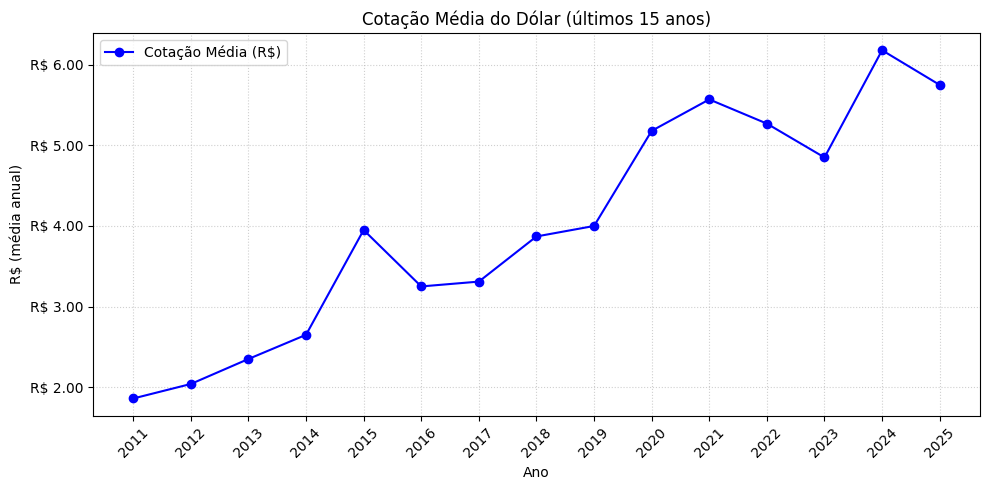

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Dados manuais
dados = [
    [2010, 1.66, -4.60],
    [2011, 1.86, 12.05],
    [2012, 2.04, 9.68],
    [2013, 2.35, 15.20],
    [2014, 2.65, 12.77],
    [2015, 3.95, 49.06],
    [2016, 3.25, -17.72],
    [2017, 3.31, 1.85],
    [2018, 3.87, 16.92],
    [2019, 4.00, 3.36],
    [2020, 5.18, 29.50],
    [2021, 5.57, 7.53],
    [2022, 5.27, -5.39],
    [2023, 4.85, -7.97],
    [2024, 6.18, 27.42],
    [2025, 5.75, -6.96],
]

# Criar DataFrame
df_dolar = pd.DataFrame(dados, columns=["Ano", "Cotação Média (R$)", "Variação (%)"])

# Filtrar últimos 15 anos
df_ultimos_15 = df_dolar[df_dolar["Ano"] >= df_dolar["Ano"].max() - 14]

# Exibir tabela
print(df_ultimos_15)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_ultimos_15["Ano"], df_ultimos_15["Cotação Média (R$)"], marker='o', color='blue', label="Cotação Média (R$)")
plt.title("Cotação Média do Dólar (últimos 15 anos)")
plt.xlabel("Ano")
plt.ylabel("R$ (média anual)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("R$ {x:,.2f}"))
plt.xticks(df_ultimos_15["Ano"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [68]:
# Função para separar quantidade e valor
def separar_quantidade_valor(df):
    df = df.copy()
    df.columns = df.columns.str.strip()
    if 'País' not in df.columns:
        df.rename(columns={df.columns[1]: 'País'}, inplace=True)
    colunas_ano = df.columns[2:]
    anos_unicos = sorted(set(col.replace(".1", "") for col in colunas_ano if col.replace(".1", "").isdigit()))
    dados = []
    for _, row in df.iterrows():
        pais = row['País']
        for ano in anos_unicos:
            quantidade = float(row.get(ano, 0))
            valor = float(row.get(f"{ano}.1", 0))
            dados.append({'ano': int(ano), 'pais_destino': pais, 'quantidade_litros': quantidade, 'valor_usd': valor})
    return pd.DataFrame(dados)

# Processamento
# Use os nomes corretos das variáveis que já foram carregadas
df_espumante = separar_quantidade_valor(df_espumante)
df_vinho = separar_quantidade_valor(df_vinho_mesa)

# Últimos 15 anos
# Certifique-se de que 'ano' existe após o processamento
if 'ano' in df_espumante.columns:
    anos_recentes = sorted(df_espumante['ano'].unique())[-15:]
    df_espumante = df_espumante[df_espumante['ano'].isin(anos_recentes)]
else:
    print("Coluna 'ano' não encontrada em df_espumante após processamento.")
    anos_recentes = [] # Define como lista vazia para evitar erro

if 'ano' in df_vinho.columns:
    df_vinho = df_vinho[df_vinho['ano'].isin(anos_recentes)]
else:
    print("Coluna 'ano' não encontrada em df_vinho após processamento.")


df_total = pd.concat([df_espumante, df_vinho])

df_espumante.head(), df_vinho.head(), df_total.head()

(     ano   pais_destino  quantidade_litros  valor_usd
 40  2010  África do Sul                0.0        0.0
 41  2011  África do Sul                0.0        0.0
 42  2012  África do Sul                0.0        0.0
 43  2013  África do Sul                0.0        0.0
 44  2014  África do Sul                0.0        0.0,
      ano pais_destino  quantidade_litros  valor_usd
 40  2010  Afeganistão                0.0        0.0
 41  2011  Afeganistão                0.0        0.0
 42  2012  Afeganistão                0.0        0.0
 43  2013  Afeganistão                0.0        0.0
 44  2014  Afeganistão                0.0        0.0,
      ano   pais_destino  quantidade_litros  valor_usd
 40  2010  África do Sul                0.0        0.0
 41  2011  África do Sul                0.0        0.0
 42  2012  África do Sul                0.0        0.0
 43  2013  África do Sul                0.0        0.0
 44  2014  África do Sul                0.0        0.0)

In [69]:
# Gerar a tabela com as colunas de interesse e métricas agregadas
tabela_analitica = df_vinho.groupby('pais_destino').agg({
    'quantidade_litros': 'sum',
    'valor_usd': 'sum'
}).sort_values(by='valor_usd', ascending=False).head(15)

# Calcular colunas adicionais
tabela_analitica['media_usd_litro'] = tabela_analitica['valor_usd'] / tabela_analitica['quantidade_litros'].replace(0, 1)
tabela_analitica['%_qtde_total'] = (tabela_analitica['quantidade_litros'] / tabela_analitica['quantidade_litros'].sum()) * 100
tabela_analitica['%_valor_total'] = (tabela_analitica['valor_usd'] / tabela_analitica['valor_usd'].sum()) * 100

# Arredondar percentuais e preço médio
tabela_analitica['media_usd_litro'] = tabela_analitica['media_usd_litro'].round(2)
tabela_analitica['%_qtde_total'] = tabela_analitica['%_qtde_total'].round(2)
tabela_analitica['%_valor_total'] = tabela_analitica['%_valor_total'].round(2)

# Resetar o índice e adicionar país de origem
tabela_analitica.reset_index(inplace=True)
tabela_analitica["pais_origem"] = "Brasil"

# Reorganizar colunas
tabela_analitica = tabela_analitica[[
    "pais_origem", "pais_destino", "quantidade_litros", "valor_usd",
    "media_usd_litro", "%_qtde_total", "%_valor_total"
]]

# Criar tabela formatada com separadores de milhar e vírgula para decimal
tabela_formatada = tabela_analitica.copy()
tabela_formatada["quantidade_litros"] = tabela_formatada["quantidade_litros"].apply(lambda x: f"{x:,.0f}".replace(",", "."))
tabela_formatada["valor_usd"] = tabela_formatada["valor_usd"].apply(lambda x: f"{x:,.0f}".replace(",", "."))
tabela_formatada["media_usd_litro"] = tabela_formatada["media_usd_litro"].apply(lambda x: f"{x:.2f}".replace(".", ","))
tabela_formatada["%_qtde_total"] = tabela_formatada["%_qtde_total"].apply(lambda x: f"{x:.2f}".replace(".", ","))
tabela_formatada["%_valor_total"] = tabela_formatada["%_valor_total"].apply(lambda x: f"{x:.2f}".replace(".", ","))

# Exibir a tabela formatada
from IPython.display import display
display(tabela_formatada)

pais_origem                     pais_destino quantidade_litros   valor_usd  \
0       Brasil                         Paraguai        34.021.588  47.591.976   
1       Brasil                           Rússia        10.909.283  17.419.774   
2       Brasil                   Estados Unidos         3.287.390   9.297.709   
3       Brasil                      Reino Unido         1.135.468   4.678.860   
4       Brasil                            China         1.055.501   4.603.890   
5       Brasil                            Haiti         2.797.418   3.906.144   
6       Brasil                          Espanha         1.988.248   3.803.901   
7       Brasil                    Países Baixos           729.406   2.898.728   
8       Brasil                            Japão           783.687   2.040.683   
9       Brasil  Alemanha, República Democrática           429.695   1.802.890   
10      Brasil                          Uruguai         1.155.417   1.736.474   
11      Brasil                          Bélgica           274.237   1.332.510   
12      Brasil                           Canadá           174.737   1.020.854   
13      Brasil                           França           312.469     737.349   
14      Brasil                            Suíça            75.707     661.182   

   media_usd_litro %_qtde_total %_valor_total  
0             1,40        57,54         45,97  
1             1,60        18,45         16,83  
2             2,83         5,56          8,98  
3             4,12         1,92          4,52  
4             4,36         1,79          4,45  
5             1,40         4,73          3,77  
6             1,91         3,36          3,67  
7             3,97         1,23          2,80  
8             2,60         1,33          1,97  
9             4,20         0,73          1,74  
10            1,50         1,95          1,68  
11            4,86         0,46          1,29  
12            5,84         0,30          0,99  
13            2,36         0,53          0,71  
14            8,73         0,13          0,64

In [70]:
def gerar_tabela_formatada_top15(df, titulo="Exportação"):
    # Agregação e ordenação
    tabela = df.groupby('pais_destino').agg({
        'quantidade_litros': 'sum',
        'valor_usd': 'sum'
    }).sort_values(by='valor_usd', ascending=False).head(16)

    # Cálculo de métricas
    tabela['media_usd_litro'] = tabela['valor_usd'] / tabela['quantidade_litros'].replace(0, 1)
    tabela['%_qtde_total'] = (tabela['quantidade_litros'] / tabela['quantidade_litros'].sum()) * 100
    tabela['%_valor_total'] = (tabela['valor_usd'] / tabela['valor_usd'].sum()) * 100

    # Arredondamentos
    tabela['media_usd_litro'] = tabela['media_usd_litro'].round(2)
    tabela['%_qtde_total'] = tabela['%_qtde_total'].round(2)
    tabela['%_valor_total'] = tabela['%_valor_total'].round(2)

    # Resetar índice e adicionar país de origem
    tabela.reset_index(inplace=True)
    tabela["pais_origem"] = "Brasil"

    # Reorganizar colunas
    tabela = tabela[[
        "pais_origem", "pais_destino", "quantidade_litros", "valor_usd",
        "media_usd_litro", "%_qtde_total", "%_valor_total"
    ]]

    # Formatação visual
    tabela_formatada = tabela.copy()
    tabela_formatada["quantidade_litros"] = tabela_formatada["quantidade_litros"].apply(lambda x: f"{x:,.0f}".replace(",", "."))
    tabela_formatada["valor_usd"] = tabela_formatada["valor_usd"].apply(lambda x: f"{x:,.0f}".replace(",", "."))
    tabela_formatada["media_usd_litro"] = tabela_formatada["media_usd_litro"].apply(lambda x: f"{x:.2f}".replace(".", ","))
    tabela_formatada["%_qtde_total"] = tabela_formatada["%_qtde_total"].apply(lambda x: f"{x:.2f}".replace(".", ","))
    tabela_formatada["%_valor_total"] = tabela_formatada["%_valor_total"].apply(lambda x: f"{x:.2f}".replace(".", ","))

    # Exibição
    from IPython.display import display
    print(f"\n📊 {titulo} - Top 15 Países por Valor Exportado:\n")
    display(tabela_formatada)

    return tabela_formatada


In [71]:
tabela_espumante = gerar_tabela_formatada_top15(df_espumante, titulo="Espumante")
tabela_vinho = gerar_tabela_formatada_top15(df_vinho, titulo="Vinho de Mesa")
tabela_total = gerar_tabela_formatada_top15(df_total, titulo="Total - Espumante + Vinho de Mesa")


📊 Espumante - Top 15 Países por Valor Exportado:



pais_origem    pais_destino quantidade_litros  valor_usd media_usd_litro  \
0       Brasil  Estados Unidos         3.463.072  9.982.405            2,88   
1       Brasil        Paraguai           632.765  1.857.360            2,94   
2       Brasil     Reino Unido           349.253  1.652.685            4,73   
3       Brasil          Angola           201.640  1.193.242            5,92   
4       Brasil         Uruguai           213.429    853.210            4,00   
5       Brasil         Belgica           130.619    625.253            4,79   
6       Brasil           China           169.935    586.351            3,45   
7       Brasil           Japão           140.530    547.043            3,89   
8       Brasil           Chile            68.091    523.593            7,69   
9       Brasil          França            47.968    358.364            7,47   
10      Brasil        Alemanha            66.678    323.377            4,85   
11      Brasil           Suíça            54.567    299.105            5,48   
12      Brasil       Cingapura            75.992    263.413            3,47   
13      Brasil         Bolívia            85.516    263.088            3,08   
14      Brasil        Portugal            29.662    232.815            7,85   
15      Brasil         Letônia            59.184    206.545            3,49   

   %_qtde_total %_valor_total  
0         59,82         50,50  
1         10,93          9,40  
2          6,03          8,36  
3          3,48          6,04  
4          3,69          4,32  
5          2,26          3,16  
6          2,94          2,97  
7          2,43          2,77  
8          1,18          2,65  
9          0,83          1,81  
10         1,15          1,64  
11         0,94          1,51  
12         1,31          1,33  
13         1,48          1,33  
14         0,51          1,18  
15         1,02          1,04


📊 Vinho de Mesa - Top 15 Países por Valor Exportado:



pais_origem                     pais_destino quantidade_litros   valor_usd  \
0       Brasil                         Paraguai        34.021.588  47.591.976   
1       Brasil                           Rússia        10.909.283  17.419.774   
2       Brasil                   Estados Unidos         3.287.390   9.297.709   
3       Brasil                      Reino Unido         1.135.468   4.678.860   
4       Brasil                            China         1.055.501   4.603.890   
5       Brasil                            Haiti         2.797.418   3.906.144   
6       Brasil                          Espanha         1.988.248   3.803.901   
7       Brasil                    Países Baixos           729.406   2.898.728   
8       Brasil                            Japão           783.687   2.040.683   
9       Brasil  Alemanha, República Democrática           429.695   1.802.890   
10      Brasil                          Uruguai         1.155.417   1.736.474   
11      Brasil                          Bélgica           274.237   1.332.510   
12      Brasil                           Canadá           174.737   1.020.854   
13      Brasil                           França           312.469     737.349   
14      Brasil                            Suíça            75.707     661.182   
15      Brasil                        Finlândia            86.768     537.443   

   media_usd_litro %_qtde_total %_valor_total  
0             1,40        57,45         45,73  
1             1,60        18,42         16,74  
2             2,83         5,55          8,93  
3             4,12         1,92          4,50  
4             4,36         1,78          4,42  
5             1,40         4,72          3,75  
6             1,91         3,36          3,66  
7             3,97         1,23          2,79  
8             2,60         1,32          1,96  
9             4,20         0,73          1,73  
10            1,50         1,95          1,67  
11            4,86         0,46          1,28  
12            5,84         0,30          0,98  
13            2,36         0,53          0,71  
14            8,73         0,13          0,64  
15            6,19         0,15          0,52


📊 Total - Espumante + Vinho de Mesa - Top 15 Países por Valor Exportado:



pais_origem                     pais_destino quantidade_litros   valor_usd  \
0       Brasil                         Paraguai        34.654.353  49.449.336   
1       Brasil                   Estados Unidos         6.750.462  19.280.114   
2       Brasil                           Rússia        11.029.692  17.470.654   
3       Brasil                      Reino Unido         1.484.721   6.331.545   
4       Brasil                            China         1.225.436   5.190.241   
5       Brasil                            Haiti         2.813.440   3.942.585   
6       Brasil                          Espanha         1.999.883   3.909.306   
7       Brasil                    Países Baixos           729.406   2.898.728   
8       Brasil                          Uruguai         1.368.846   2.589.684   
9       Brasil                            Japão           924.217   2.587.726   
10      Brasil  Alemanha, República Democrática           429.695   1.802.890   
11      Brasil                           Angola           290.001   1.614.113   
12      Brasil                          Bélgica           274.237   1.332.510   
13      Brasil                           França           360.437   1.095.713   
14      Brasil                           Canadá           174.737   1.020.854   
15      Brasil                            Suíça           130.274     960.287   

   media_usd_litro %_qtde_total %_valor_total  
0             1,43        53,61         40,71  
1             2,86        10,44         15,87  
2             1,58        17,06         14,38  
3             4,26         2,30          5,21  
4             4,24         1,90          4,27  
5             1,40         4,35          3,25  
6             1,95         3,09          3,22  
7             3,97         1,13          2,39  
8             1,89         2,12          2,13  
9             2,80         1,43          2,13  
10            4,20         0,66          1,48  
11            5,57         0,45          1,33  
12            4,86         0,42          1,10  
13            3,04         0,56          0,90  
14            5,84         0,27          0,84  
15            7,37         0,20          0,79

In [72]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

def gerar_graficos_por_pais(df, titulo):
    agregados = df.groupby('pais_destino').agg({
        'quantidade_litros': 'sum',
        'valor_usd': 'sum'
    }).sort_values(by='valor_usd', ascending=False)
    agregados['media_usd_litro'] = agregados['valor_usd'] / agregados['quantidade_litros'].replace(0, 1)

    top5 = agregados.head(5)
    total_qtde = agregados['quantidade_litros'].sum()
    total_valor = agregados['valor_usd'].sum()
    top5_qtde = top5.copy()
    top5_valor = top5.copy()
    top5_qtde['representatividade_qtde%'] = (top5_qtde['quantidade_litros'] / total_qtde) * 100
    top5_valor['representatividade_valor%'] = (top5_valor['valor_usd'] / total_valor) * 100

    plt.figure(figsize=(12, 6))
    sns.barplot(data=agregados.reset_index().head(15), x='quantidade_litros', y='pais_destino', palette='Blues_d')
    plt.title(f"{titulo} - Top 15 Países por Quantidade (L)")
    plt.xlabel("Quantidade (litros)")
    plt.ylabel("País de destino")
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.0f} Mi'.replace('.', ',')))
    plt.grid(True, axis='x', linestyle=':', linewidth=0.8, color='gray')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=agregados.reset_index().head(15), x='valor_usd', y='pais_destino', palette='Greens_d')
    plt.title(f"{titulo} - Top 15 Países por Valor (US$)")
    plt.xlabel("Valor (US$)")
    plt.ylabel("País de destino")
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.0f} Mi'.replace('.', ',')))
    plt.grid(True, axis='x', linestyle=':', linewidth=0.8, color='gray')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=top5_qtde.reset_index(), x='representatividade_qtde%', y='pais_destino', palette='Blues_d')
    plt.title(f"{titulo} - Top 5 Países - % da Quantidade Total")
    plt.xlabel("Representatividade (%)")
    plt.ylabel("País de destino")
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    plt.grid(True, axis='x', linestyle=':', linewidth=0.8, color='gray')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=top5_valor.reset_index(), x='representatividade_valor%', y='pais_destino', palette='Greens_d')
    plt.title(f"{titulo} - Top 5 Países - % do Valor Total")
    plt.xlabel("Representatividade (%)")
    plt.ylabel("País de destino")
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    plt.grid(True, axis='x', linestyle=':', linewidth=0.8, color='gray')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=agregados.reset_index().head(15), x='media_usd_litro', y='pais_destino', palette='Greens_d')
    plt.title(f"{titulo} - Top 15 Países por Preço Médio (US$/L)")
    plt.xlabel("Preço médio (US$/L)")
    plt.ylabel("País de destino")
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'$ {x:.2f}'.replace('.', ',')))
    plt.grid(True, axis='x', linestyle='--', linewidth=0.8, color='gray')
    plt.tight_layout()
    plt.show()

    # Gráfico de Pizza
    plt.figure(figsize=(6, 6))
    plt.title(f"{titulo} - Top 5 - Participação no Valor Exportado")
    plt.pie(top5_valor['representatividade_valor%'], labels=top5_valor.index,
            autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    plt.tight_layout()
    plt.show

<ipython-input-72-109ae98faaa6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='quantidade_litros', y='pais_destino', palette='Blues_d')


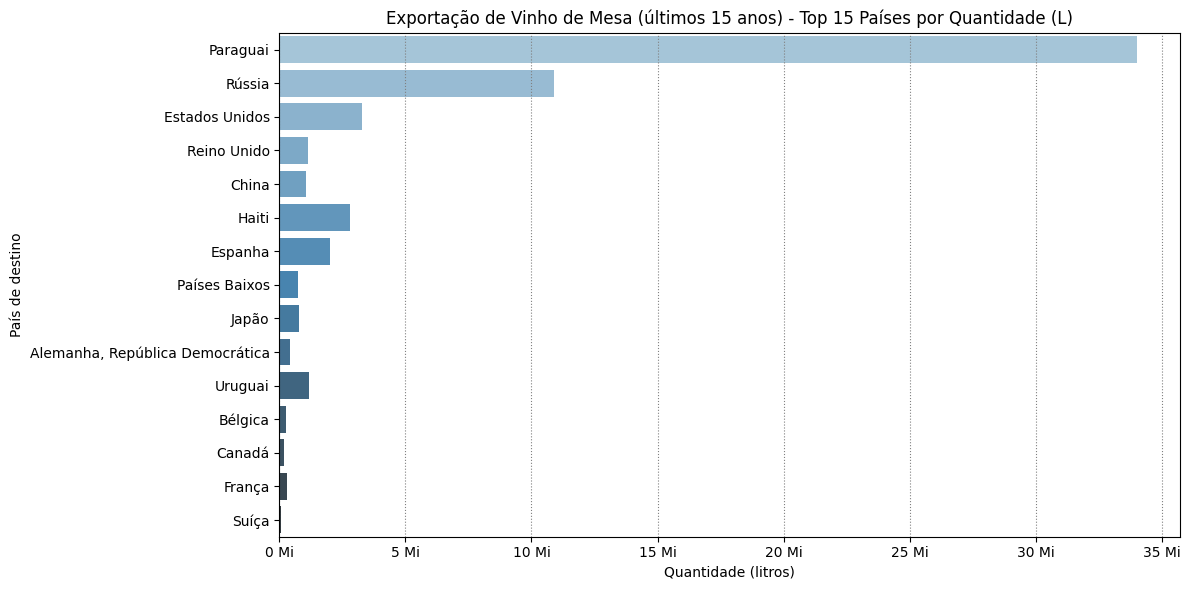

<ipython-input-72-109ae98faaa6>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='valor_usd', y='pais_destino', palette='Greens_d')


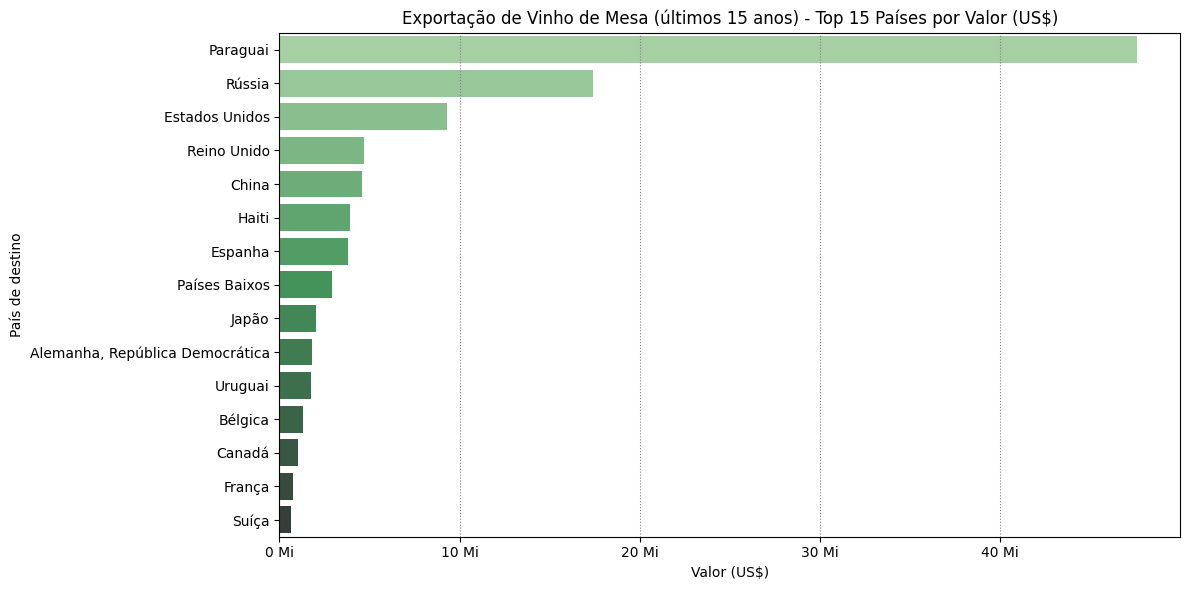

<ipython-input-72-109ae98faaa6>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_qtde.reset_index(), x='representatividade_qtde%', y='pais_destino', palette='Blues_d')


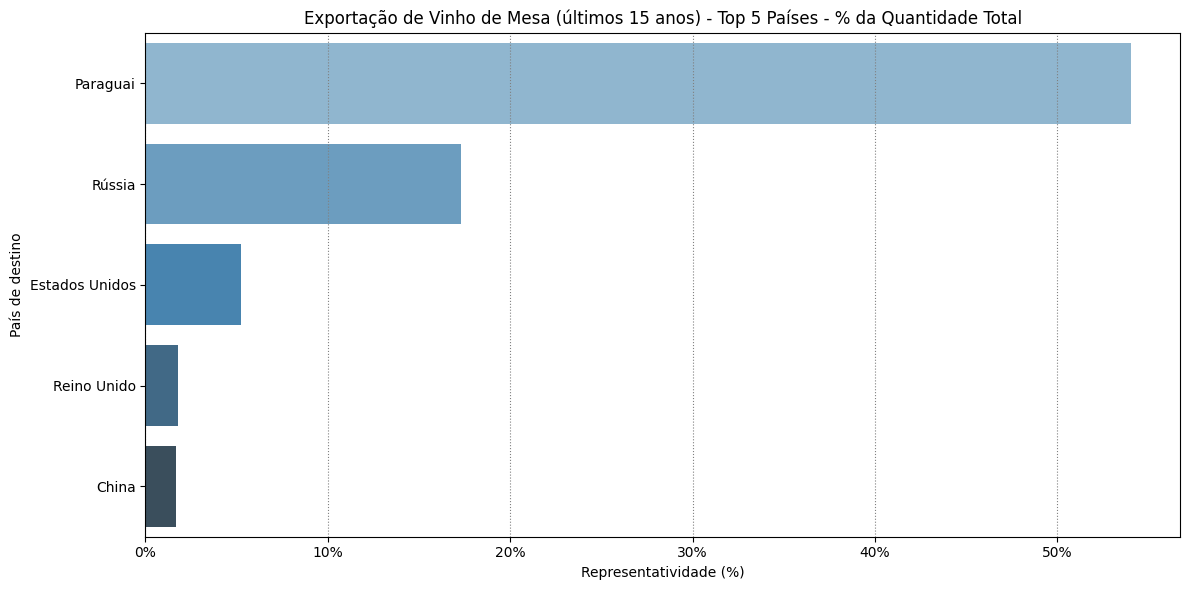

<ipython-input-72-109ae98faaa6>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_valor.reset_index(), x='representatividade_valor%', y='pais_destino', palette='Greens_d')


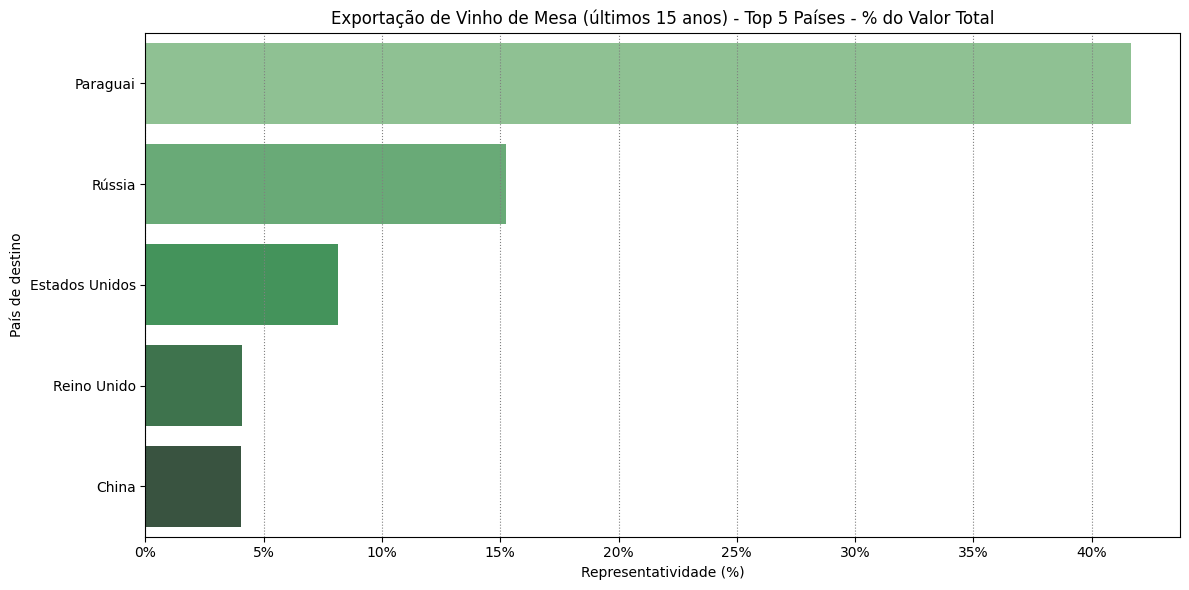

<ipython-input-72-109ae98faaa6>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='media_usd_litro', y='pais_destino', palette='Greens_d')


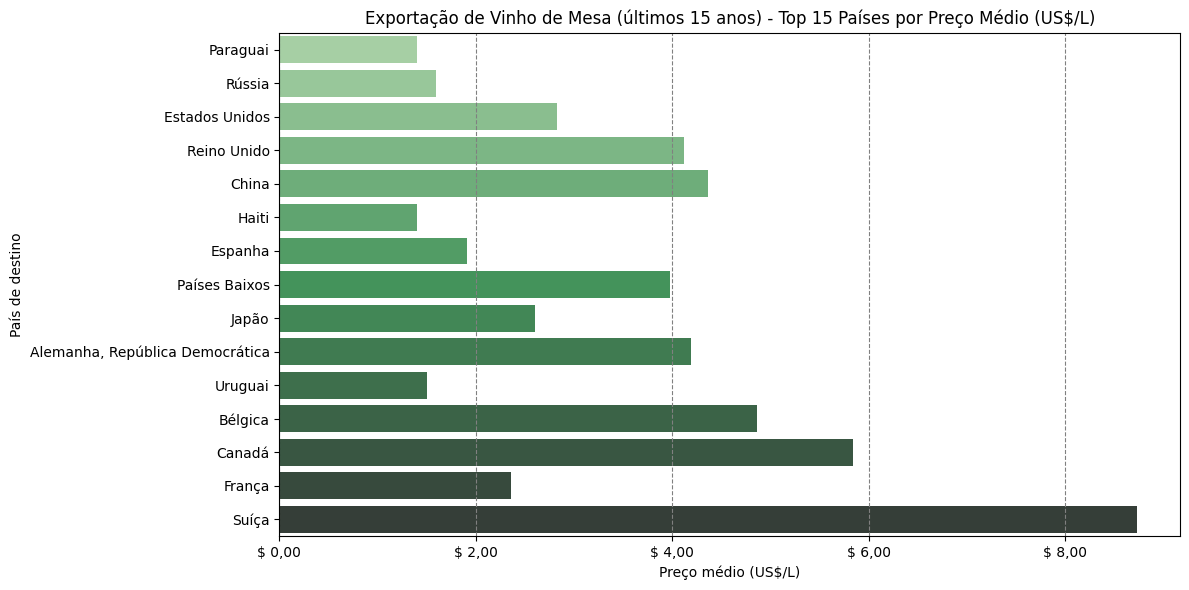

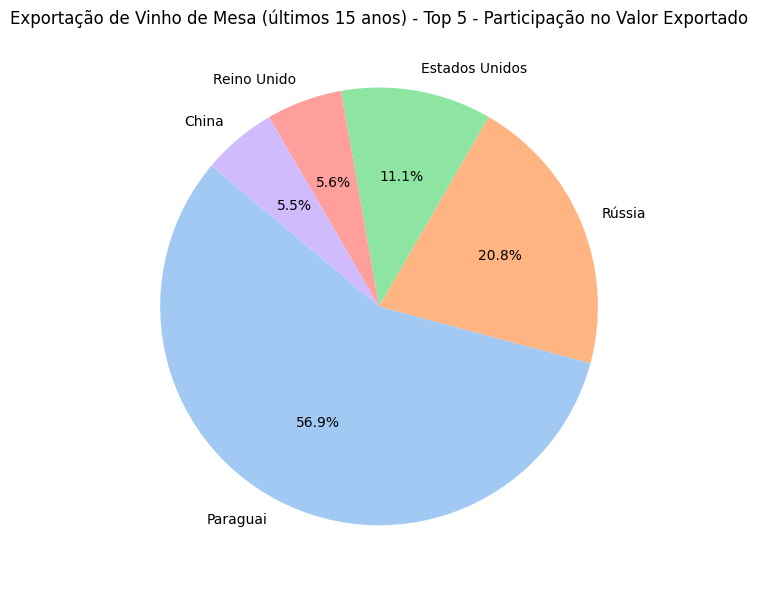

In [73]:
gerar_graficos_por_pais(df_vinho, "Exportação de Vinho de Mesa (últimos 15 anos)")

<ipython-input-72-109ae98faaa6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='quantidade_litros', y='pais_destino', palette='Blues_d')


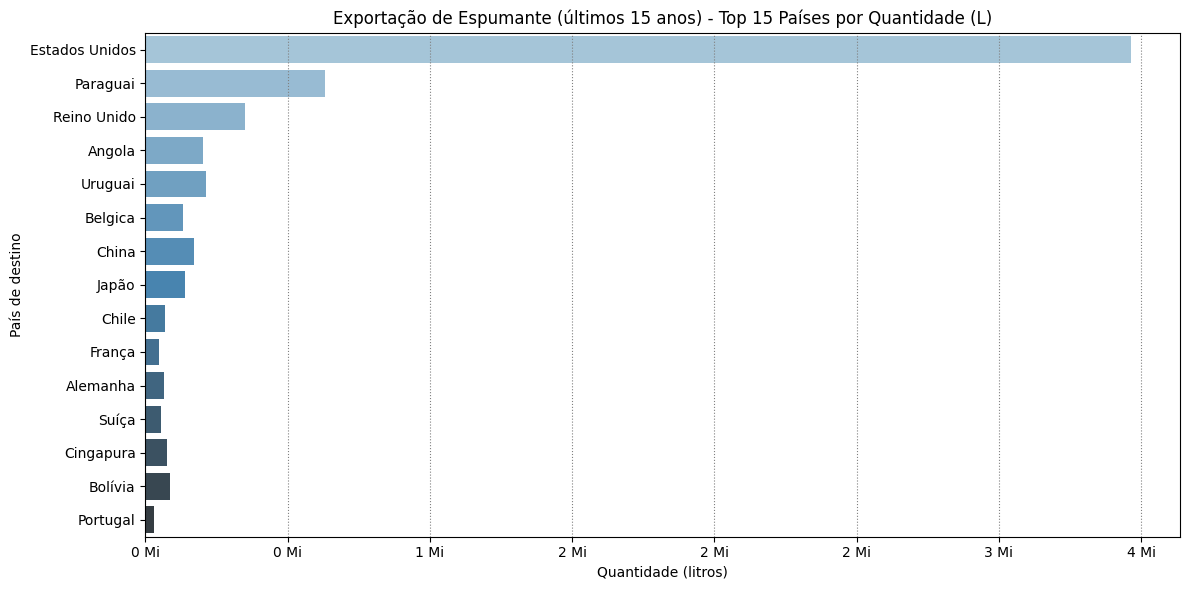

<ipython-input-72-109ae98faaa6>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='valor_usd', y='pais_destino', palette='Greens_d')


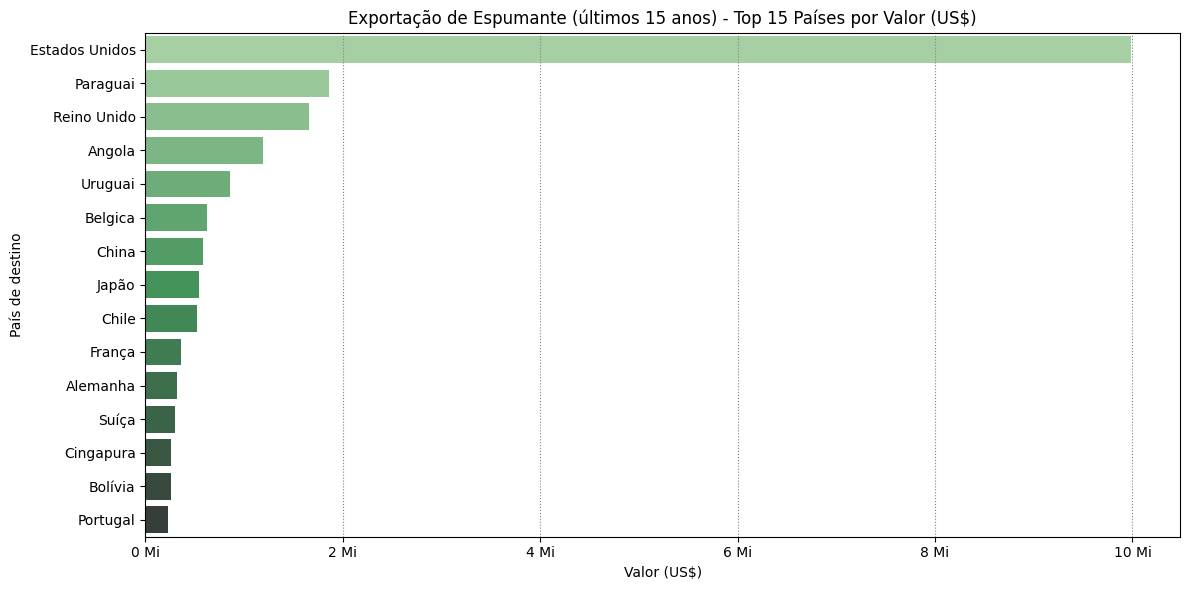

<ipython-input-72-109ae98faaa6>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_qtde.reset_index(), x='representatividade_qtde%', y='pais_destino', palette='Blues_d')


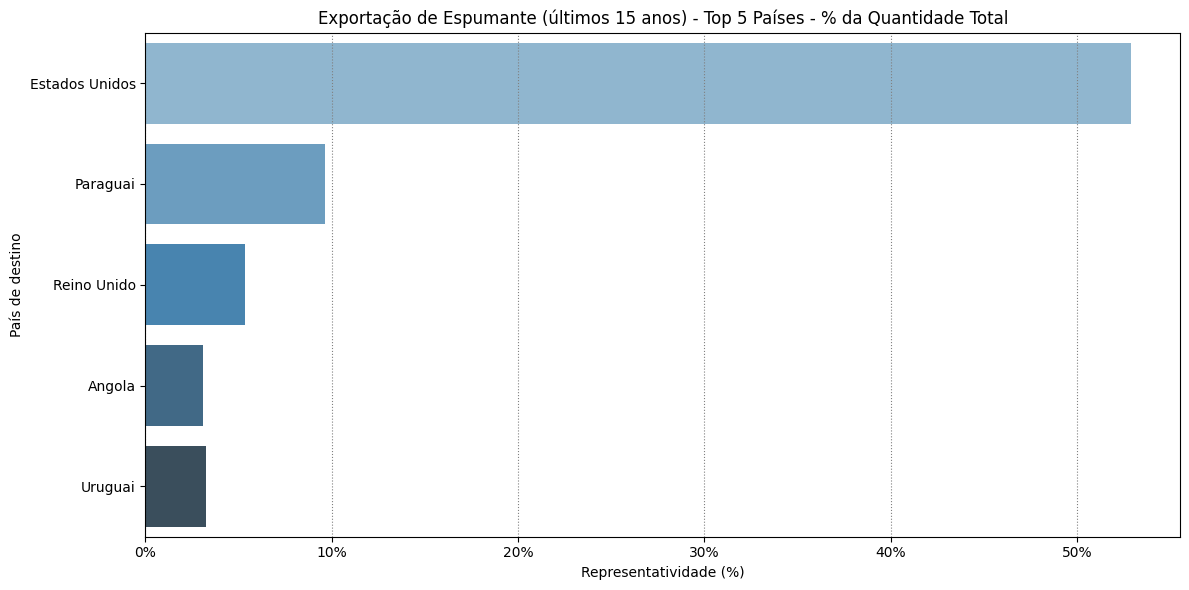

<ipython-input-72-109ae98faaa6>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_valor.reset_index(), x='representatividade_valor%', y='pais_destino', palette='Greens_d')


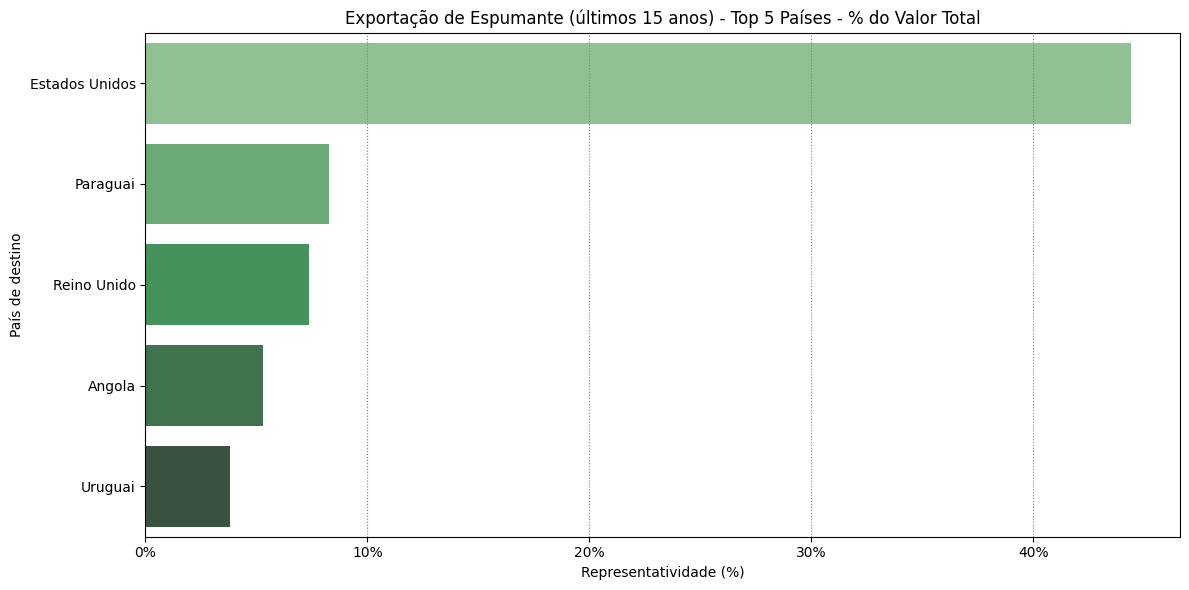

<ipython-input-72-109ae98faaa6>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='media_usd_litro', y='pais_destino', palette='Greens_d')


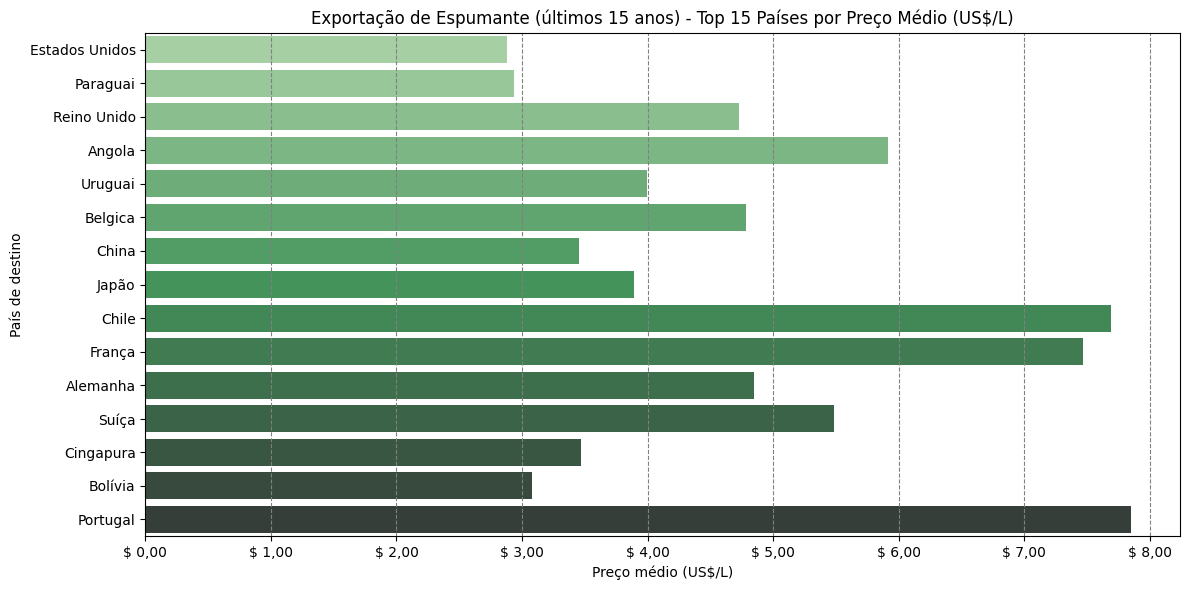

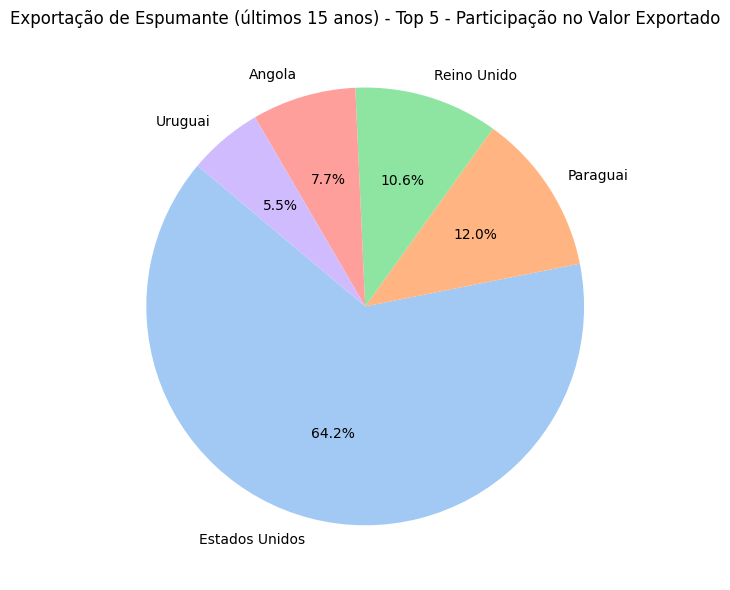

In [74]:
gerar_graficos_por_pais(df_espumante, "Exportação de Espumante (últimos 15 anos)")

<ipython-input-41-109ae98faaa6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='quantidade_litros', y='pais_destino', palette='Blues_d')


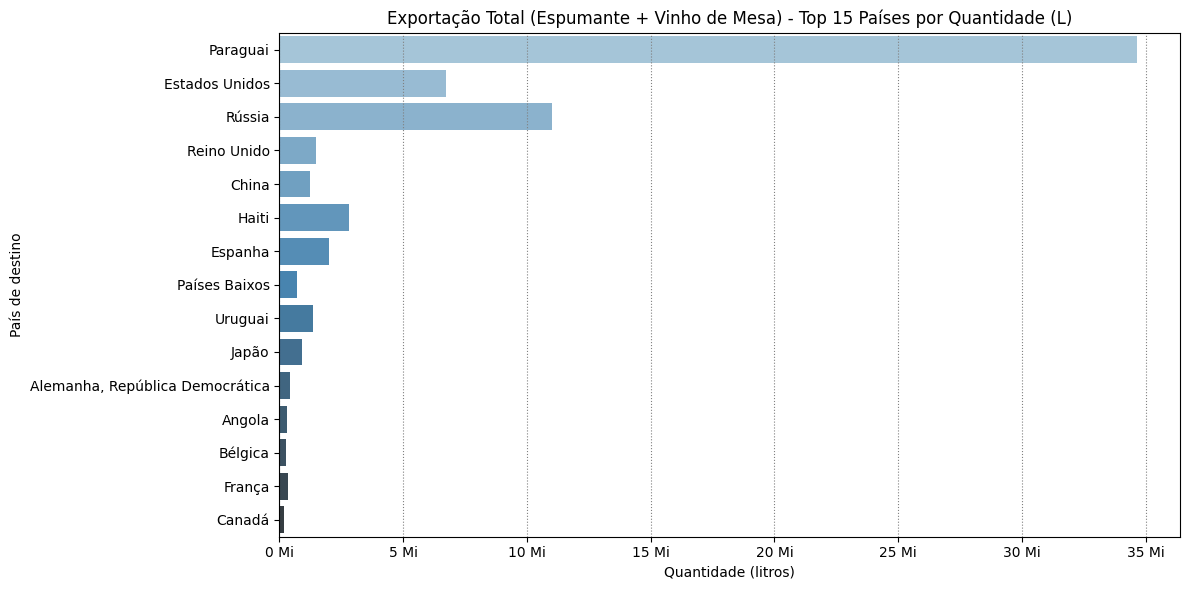

<ipython-input-41-109ae98faaa6>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='valor_usd', y='pais_destino', palette='Greens_d')


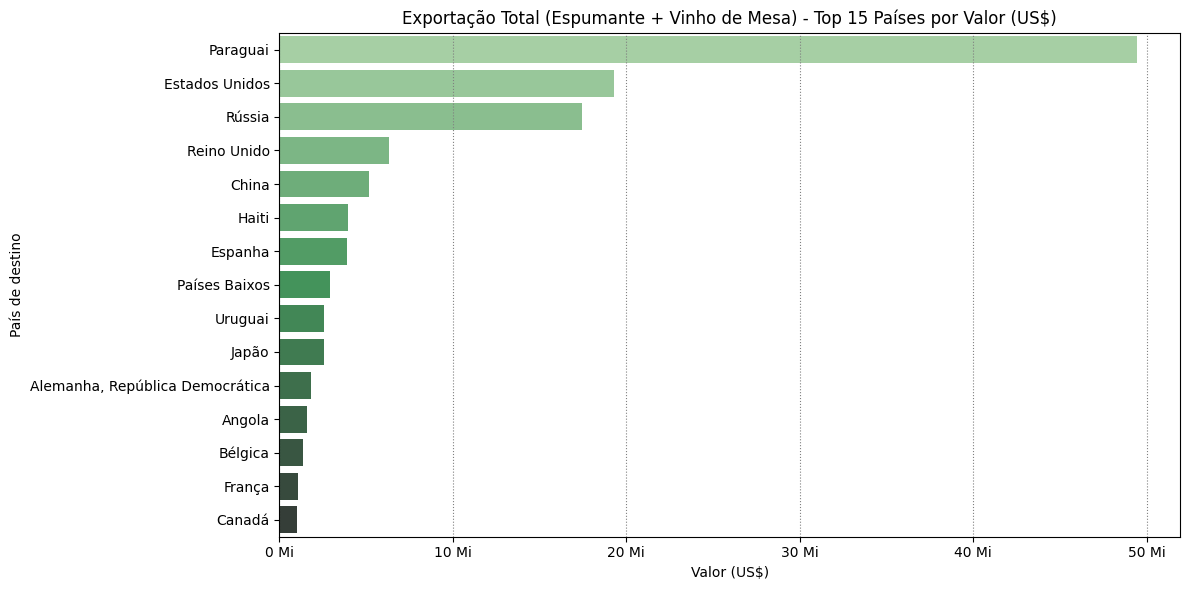

<ipython-input-41-109ae98faaa6>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_qtde.reset_index(), x='representatividade_qtde%', y='pais_destino', palette='Blues_d')


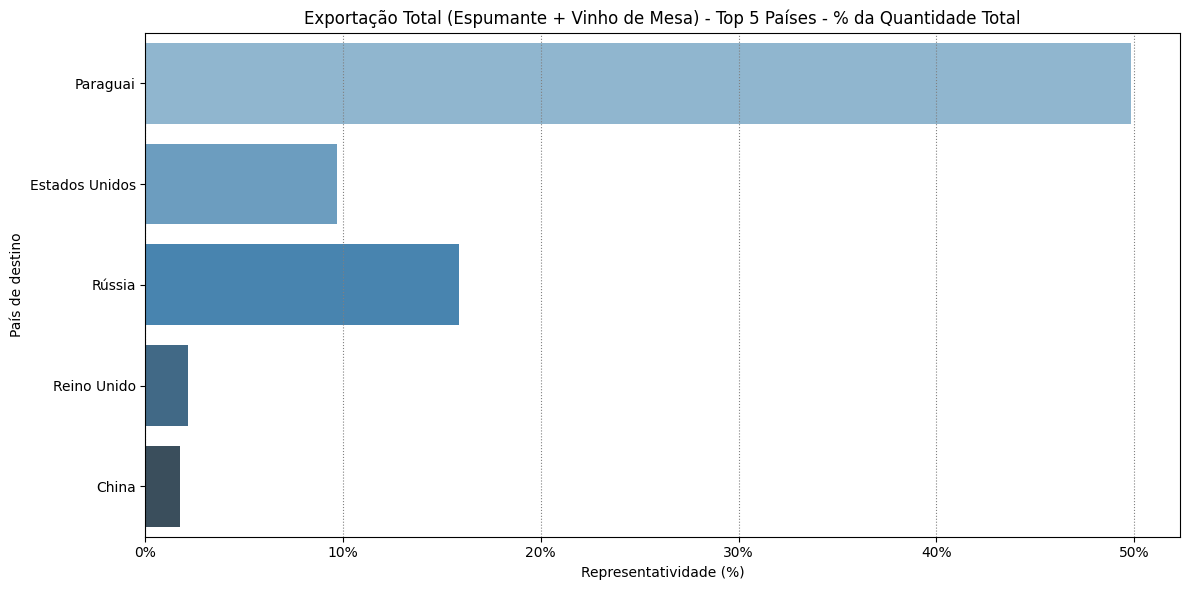

<ipython-input-41-109ae98faaa6>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_valor.reset_index(), x='representatividade_valor%', y='pais_destino', palette='Greens_d')


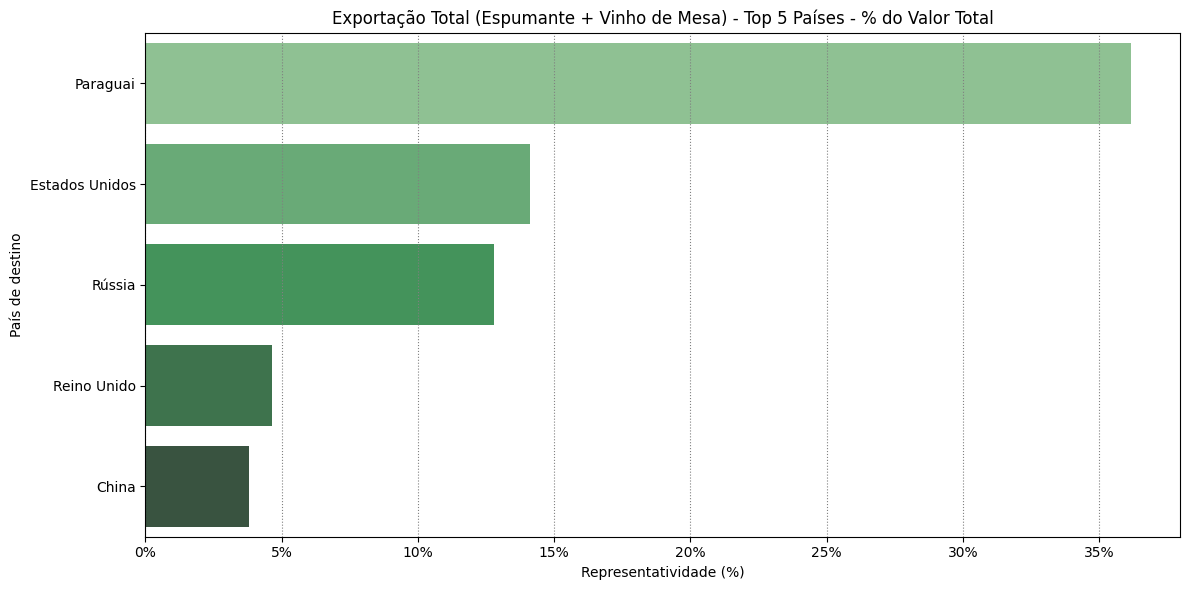

<ipython-input-41-109ae98faaa6>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agregados.reset_index().head(15), x='media_usd_litro', y='pais_destino', palette='Greens_d')


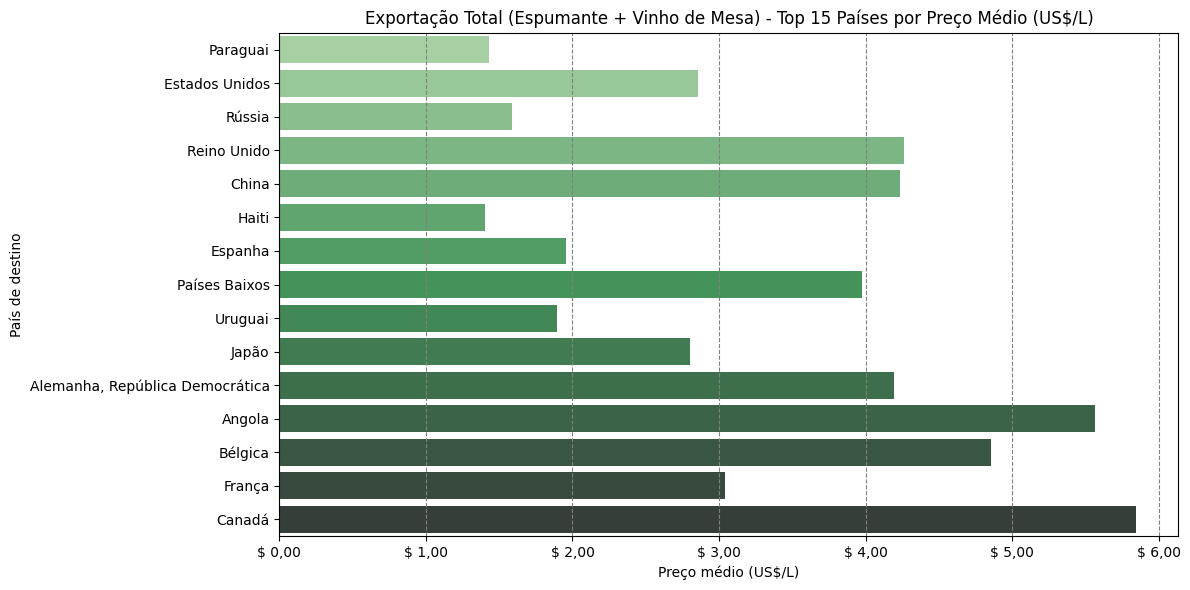

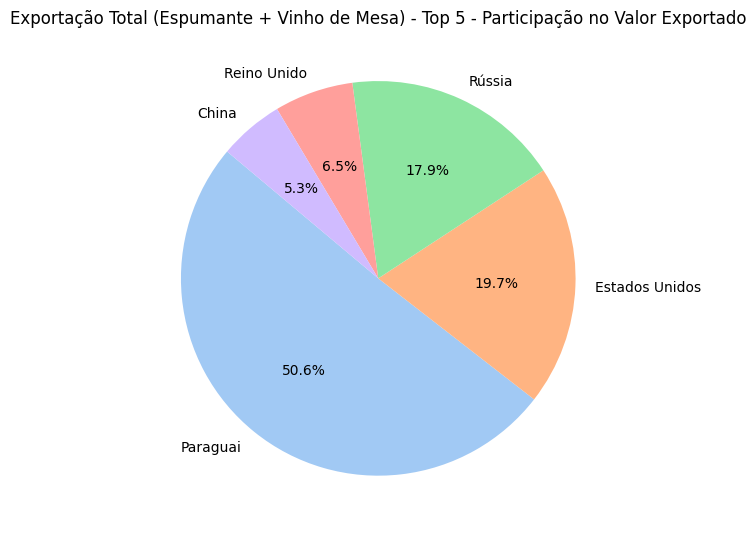

In [44]:
gerar_graficos_por_pais(df_total, "Exportação Total (Espumante + Vinho de Mesa)")

In [45]:
# Atualizando a função `gerar_graficos_por_ano` com o gráfico 2 ajustado com eixos mais "quebrados"
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FixedLocator, MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

def gerar_graficos_por_ano(df, titulo):
    ultimos_15 = sorted(df['ano'].unique())[-15:]
    ultimos_5 = ultimos_15[-5:]

    df_15 = df[df['ano'].isin(ultimos_15)]
    df_5 = df[df['ano'].isin(ultimos_5)]

    # Gráfico 1: Barra + Linha
    df_total_ano = df_15.groupby('ano').agg({'quantidade_litros': 'sum', 'valor_usd': 'sum'}).reset_index()
    df_total_ano['ano'] = df_total_ano['ano'].astype(str)

    fig, ax1 = plt.subplots(figsize=(14, 6))
    sns.barplot(data=df_total_ano, x='ano', y='quantidade_litros', ax=ax1, color='skyblue')
    ax1.set_ylabel('Quantidade em milhões (L)', fontsize=12)
    ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1_000_000:.0f}'.replace('.', ',')))
    ax1.grid(True, axis='y', linestyle=':', linewidth=0.8, color='gray')

    ax2 = ax1.twinx()
    sns.lineplot(data=df_total_ano, x='ano', y='valor_usd', ax=ax2, color='darkblue', marker='o')
    ax2.set_ylabel('Valor em milhões (US$)', fontsize=12)
    ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1_000_000:.0f}'.replace('.', ',')))

    ax1.set_title(f'{titulo} - Quantidade e Valor Total por ano', fontsize=14)
    ax1.set_xlabel('Ano')
    plt.xticks(rotation=45)

    custom_legend = [
        Patch(color='skyblue', label='Quantidade (L)'),
        Line2D([0], [0], color='darkblue', marker='o', label='Valor (US$)')
    ]
    ax2.legend(handles=custom_legend, loc='upper left')

    plt.tight_layout()
    plt.show()

    # Gráfico 2: Evolução por país
    top_paises = df.groupby('pais_destino')['valor_usd'].sum().nlargest(5).index
    df_top = df_15[df_15['pais_destino'].isin(top_paises)]

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_top, x='ano', y='valor_usd', hue='pais_destino', marker='o')
    plt.title(f'{titulo} - Evolução por País', fontsize=14)
    plt.xlabel('Ano')
    plt.ylabel('Valor em milhões (US$)')
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1_000_000:.0f}'.replace('.', ',')))
    plt.grid(True, axis='y', linestyle=':', linewidth=0.8, color='gray')
    plt.xticks(sorted(df_top['ano'].unique()), rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Pizza
    df_pizza = df_5.groupby('pais_destino')['valor_usd'].sum().sort_values(ascending=False).head(6)
    total_5 = df_5['valor_usd'].sum()
    percentual = (df_pizza / total_5) * 100

    fig2, ax_pie = plt.subplots(figsize=(6, 6))
    ax_pie.pie(percentual, labels=df_pizza.index, autopct='%1.1f%%',
               colors=sns.color_palette('Set2'), startangle=140)
    ax_pie.set_title(f'{titulo} - Participação por País (Últimos 5 anos)', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Gráfico 4: Representatividade
    df_total_15 = df_15.groupby('pais_destino')['valor_usd'].sum()
    df_total_5 = df_5.groupby('pais_destino')['valor_usd'].sum()
    representatividade = (df_total_5 / df_total_15.reindex(df_total_5.index)).dropna() * 100
    representatividade = representatividade.sort_values(ascending=False).head(10).reset_index()
    representatividade.columns = ['pais_destino', 'representatividade_%']

    plt.figure(figsize=(12, 6))
    sns.barplot(data=representatividade, x='representatividade_%', y='pais_destino', palette='magma')
    plt.title(f'{titulo} - Representatividade dos Últimos 5 Anos nos Últimos 15', fontsize=14)
    plt.xlabel('% sobre os 15 anos')
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    plt.grid(True, axis='x', linestyle=':', linewidth=0.8, color='gray')
    plt.tight_layout()
    plt.show()

    # Gráfico 5: Duas linhas com eixo quebrado
    plt.figure(figsize=(12, 10))

    # Plotando as duas séries
    plt.plot(df_total_ano['ano'], df_total_ano['quantidade_litros'] / 1_000_000, label='Quantidade (L)', marker='o')
    plt.plot(df_total_ano['ano'], df_total_ano['valor_usd'] / 1_000_000, label='Valor (US$)', marker='s')

    # Calculando limite máximo do eixo Y
    max_val = max(df_total_ano['quantidade_litros'].max(), df_total_ano['valor_usd'].max()) / 1_000_000
    max_y = int(max_val) + (2 - int(max_val) % 2)  # próximo múltiplo de 2
    plt.gca().yaxis.set_major_locator(FixedLocator(list(range(0, max_y + 2, 2))))
    plt.tick_params(axis='y', labelsize=10)

    # Formatando os rótulos em milhões com ponto como separador de milhar
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'.replace(',', '.')))

    # Estilo
    plt.grid(True, which='major', linestyle=':', linewidth=0.8, alpha=0.7)
    plt.title(f'{titulo} Quantidade vs Valor - Linhas no Mesmo Eixo (Intervalo de 2 milhões)')
    plt.ylabel('Milhões')
    plt.xlabel('Ano')
    plt.xticks(rotation=45)

    # Legenda
    plt.legend(loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.show()


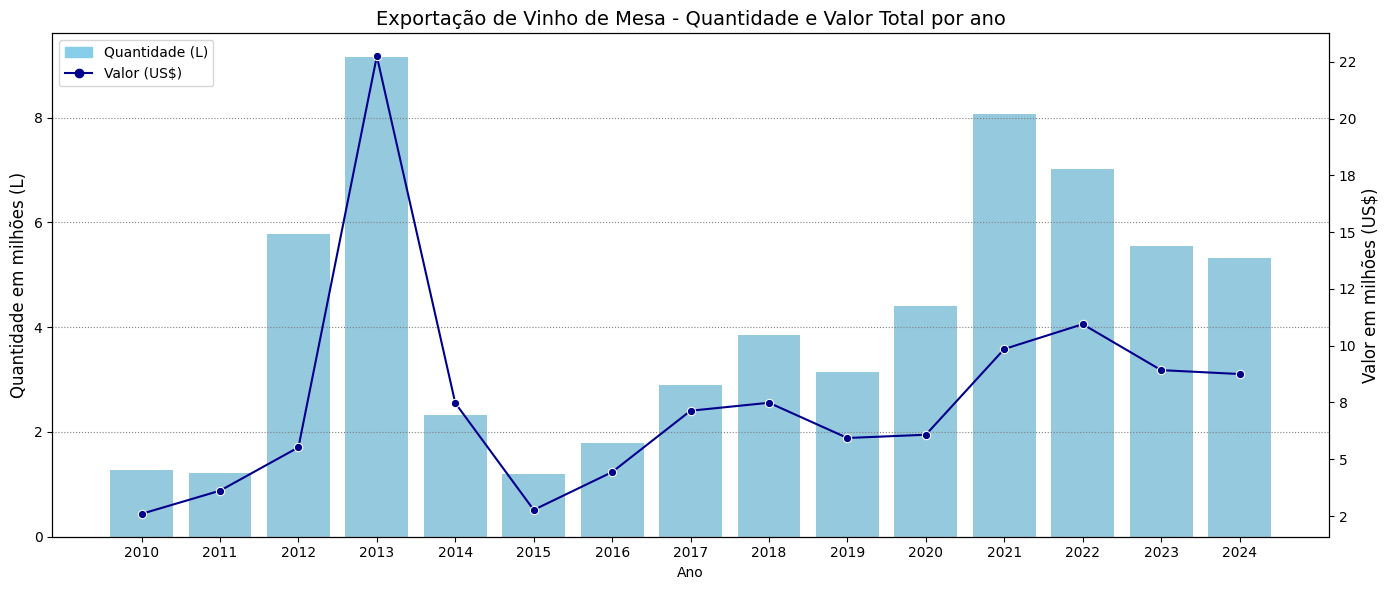

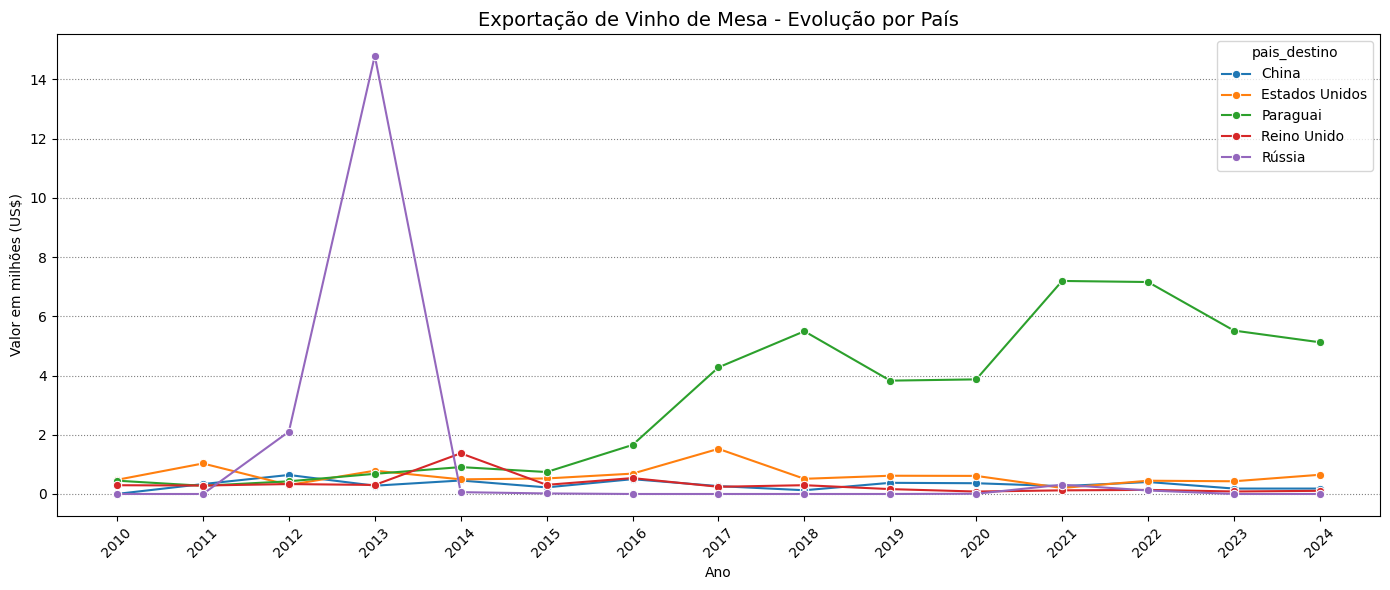

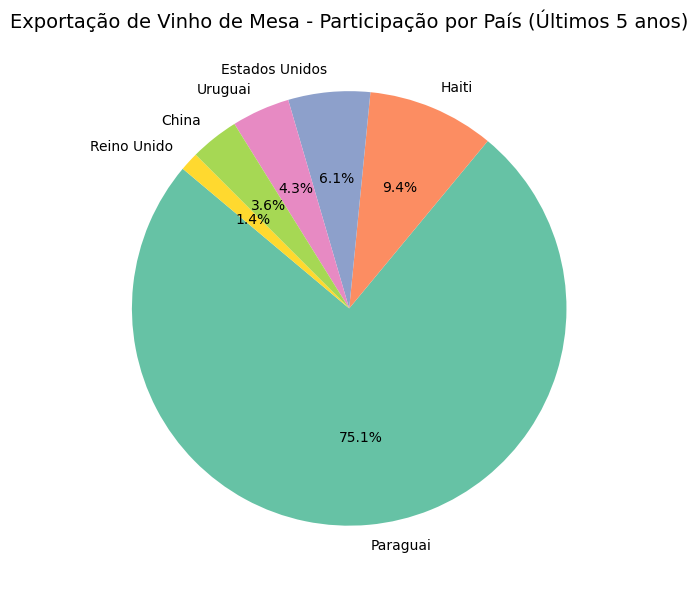

<ipython-input-45-9939e5d2f3b8>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=representatividade, x='representatividade_%', y='pais_destino', palette='magma')


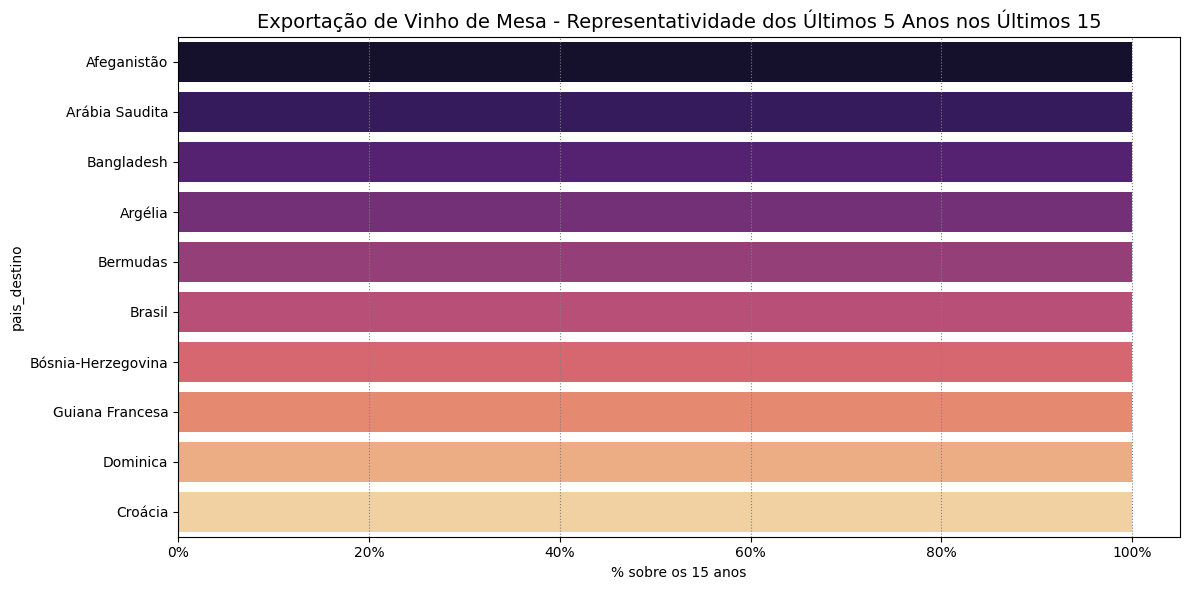

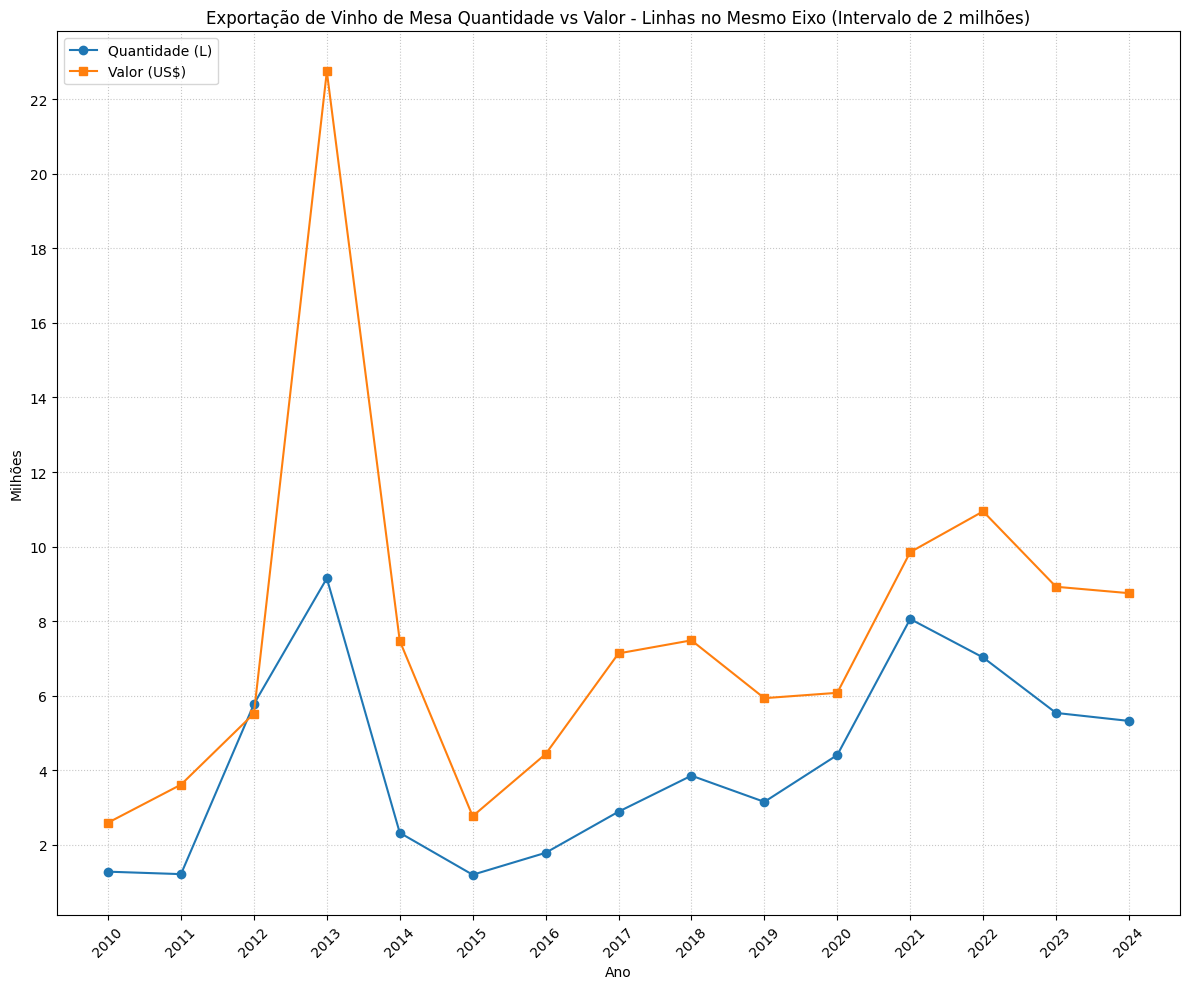

In [46]:
gerar_graficos_por_ano(df_vinho, "Exportação de Vinho de Mesa")

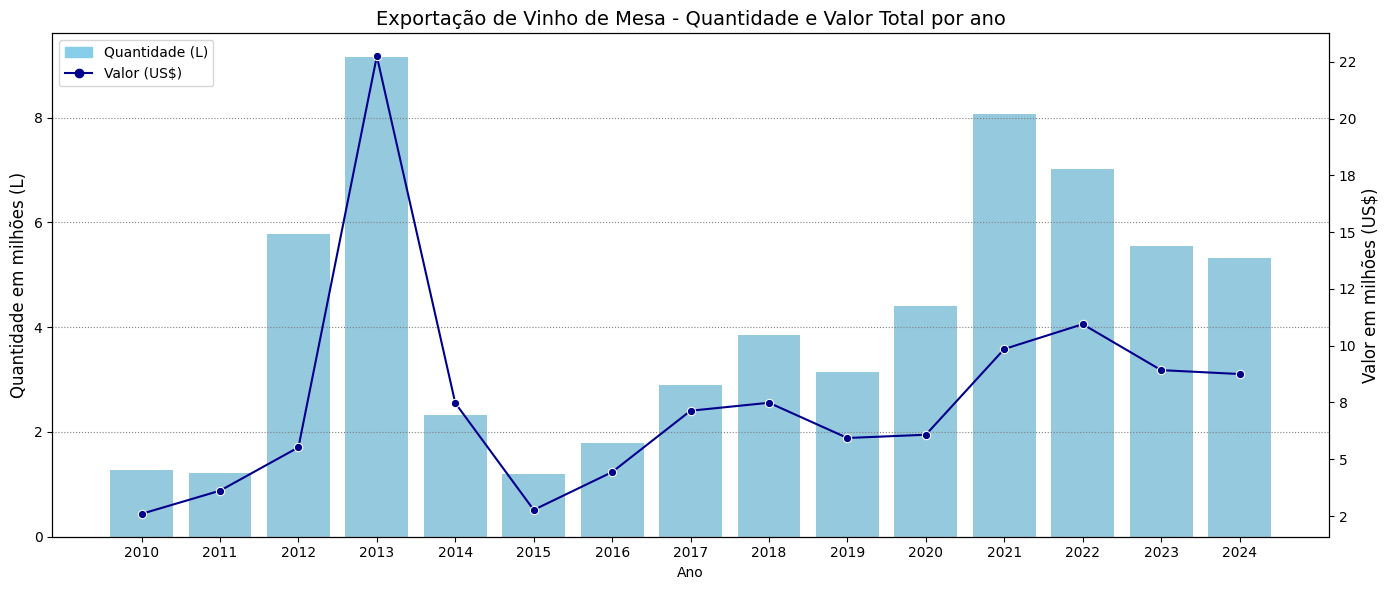

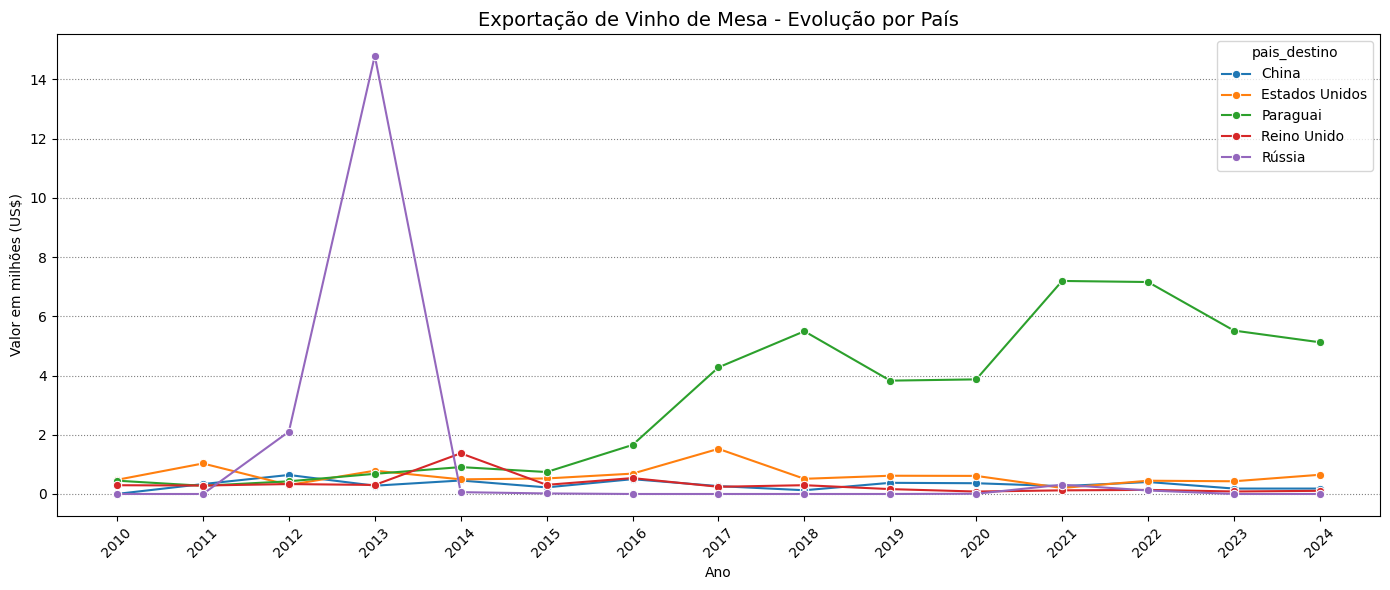

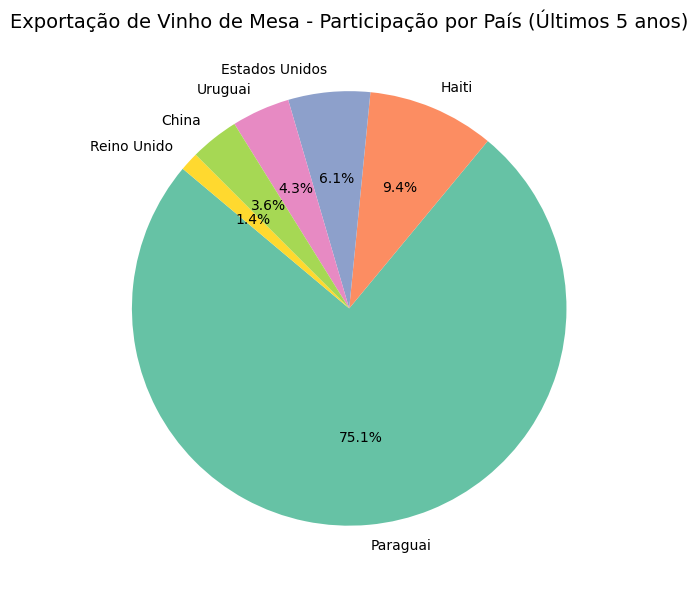

<ipython-input-45-9939e5d2f3b8>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=representatividade, x='representatividade_%', y='pais_destino', palette='magma')


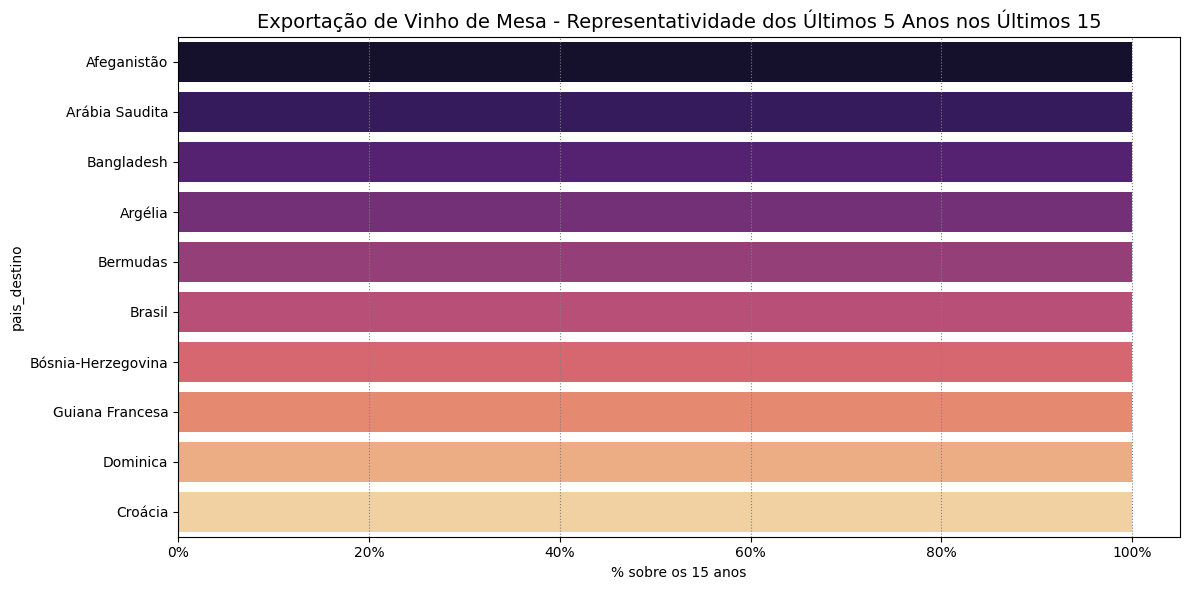

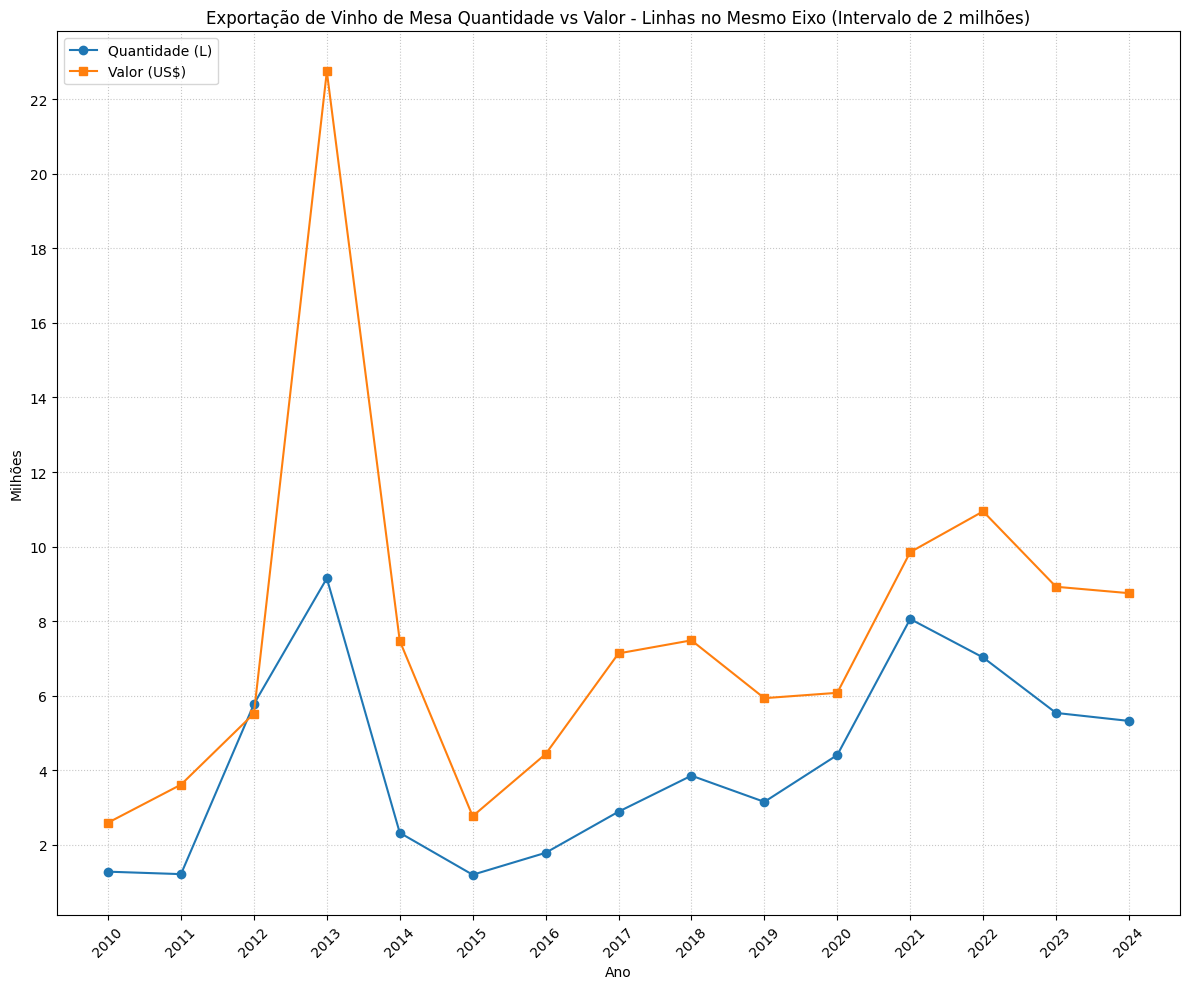

In [47]:
gerar_graficos_por_ano(df_vinho, "Exportação de Vinho de Mesa")

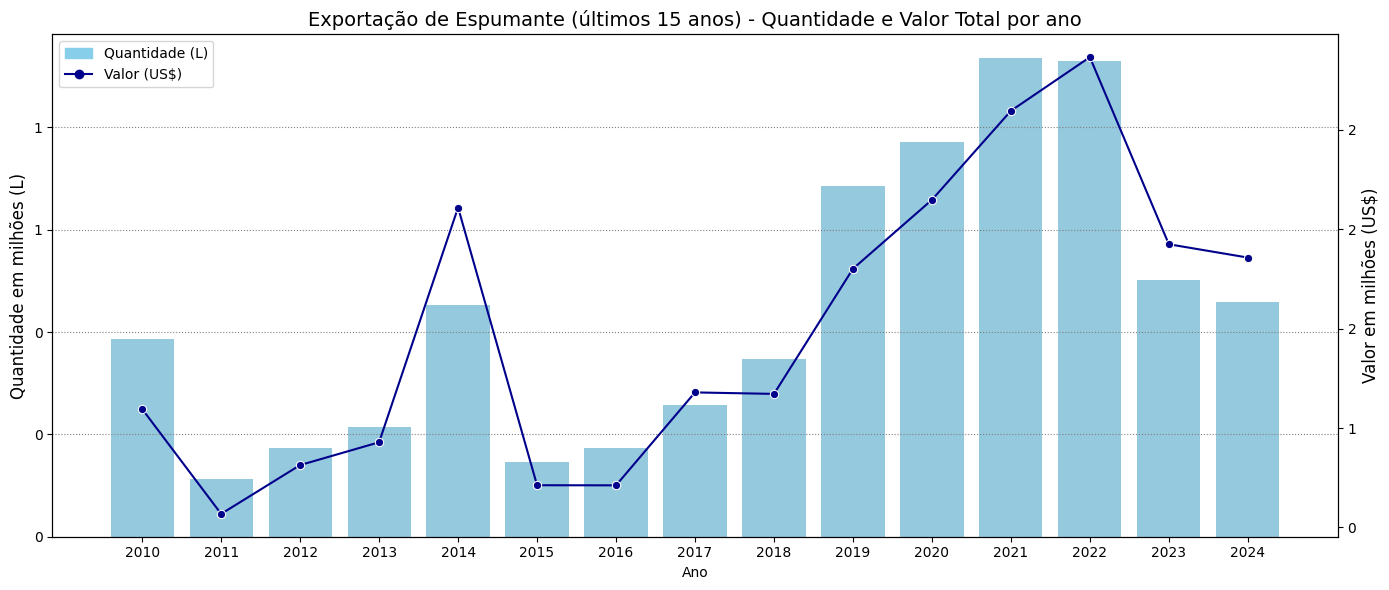

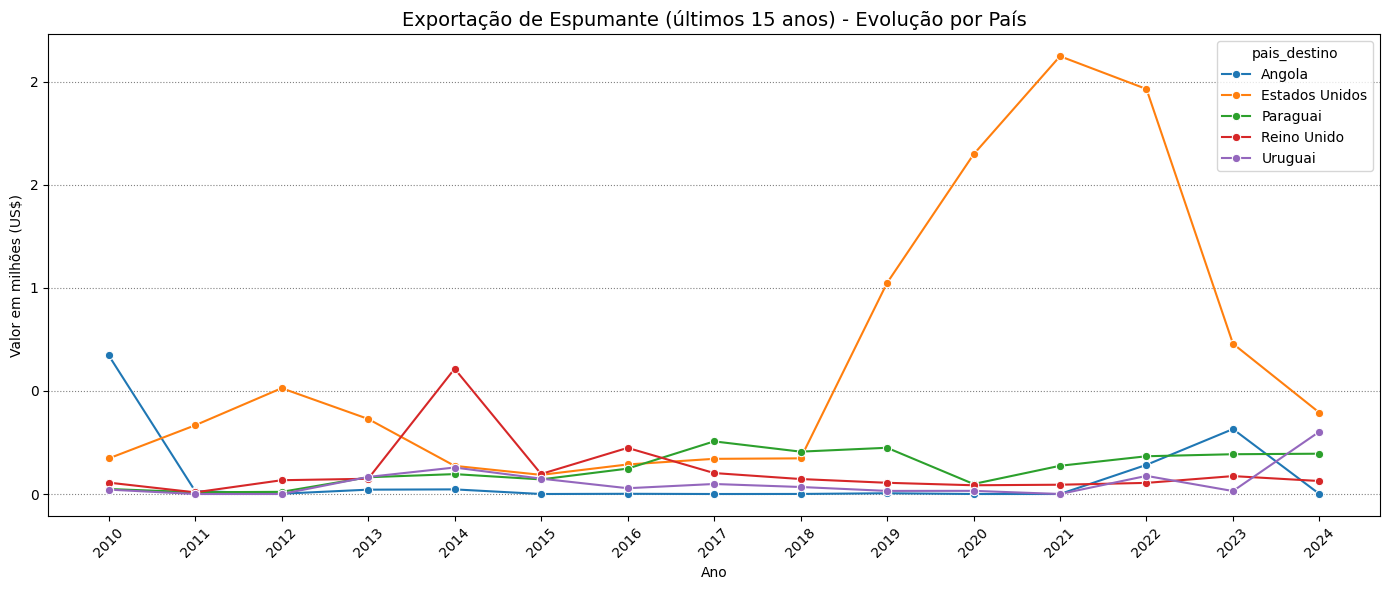

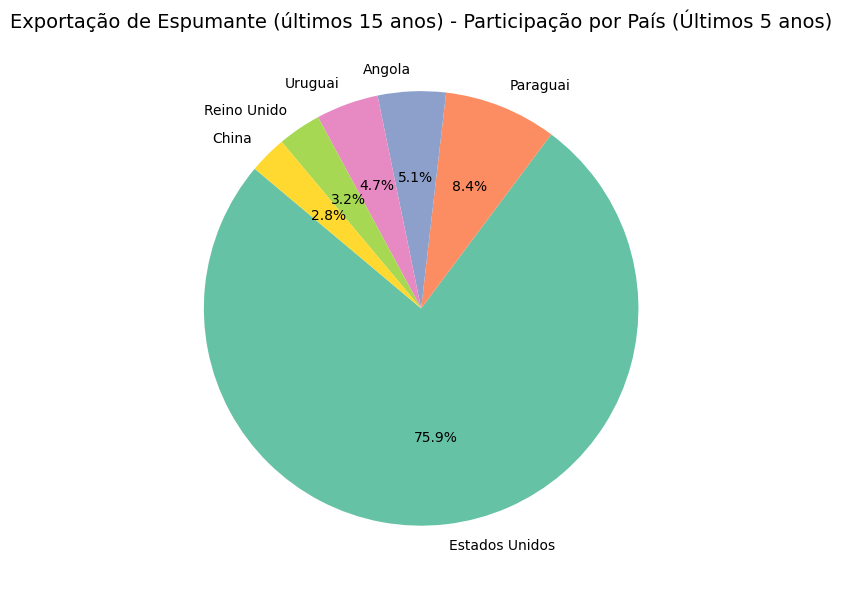

<ipython-input-45-9939e5d2f3b8>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=representatividade, x='representatividade_%', y='pais_destino', palette='magma')


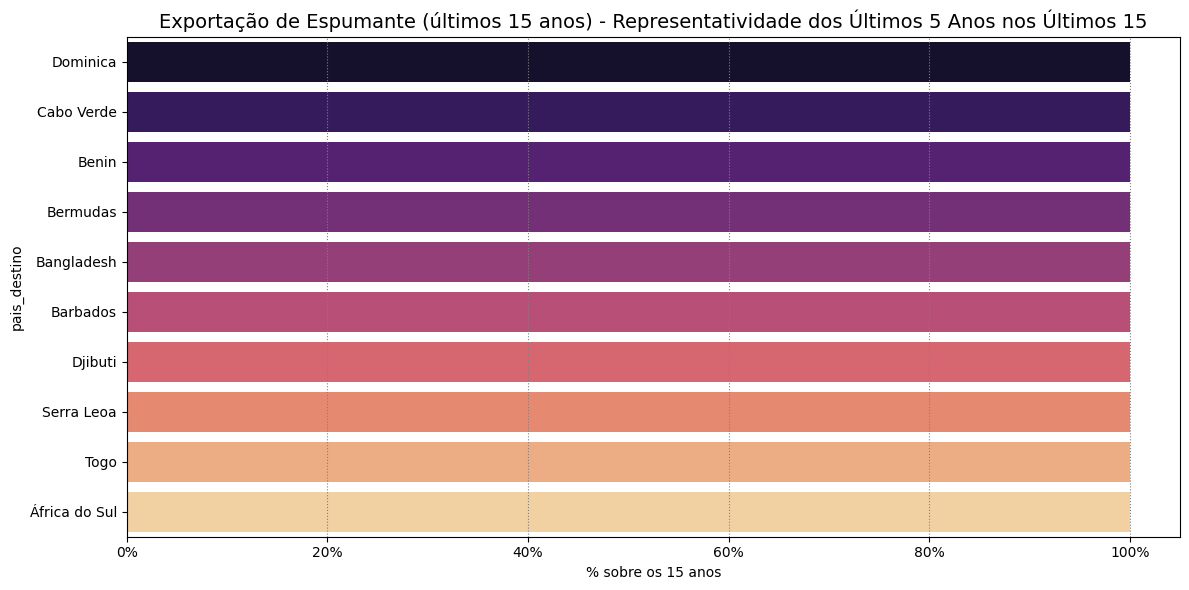

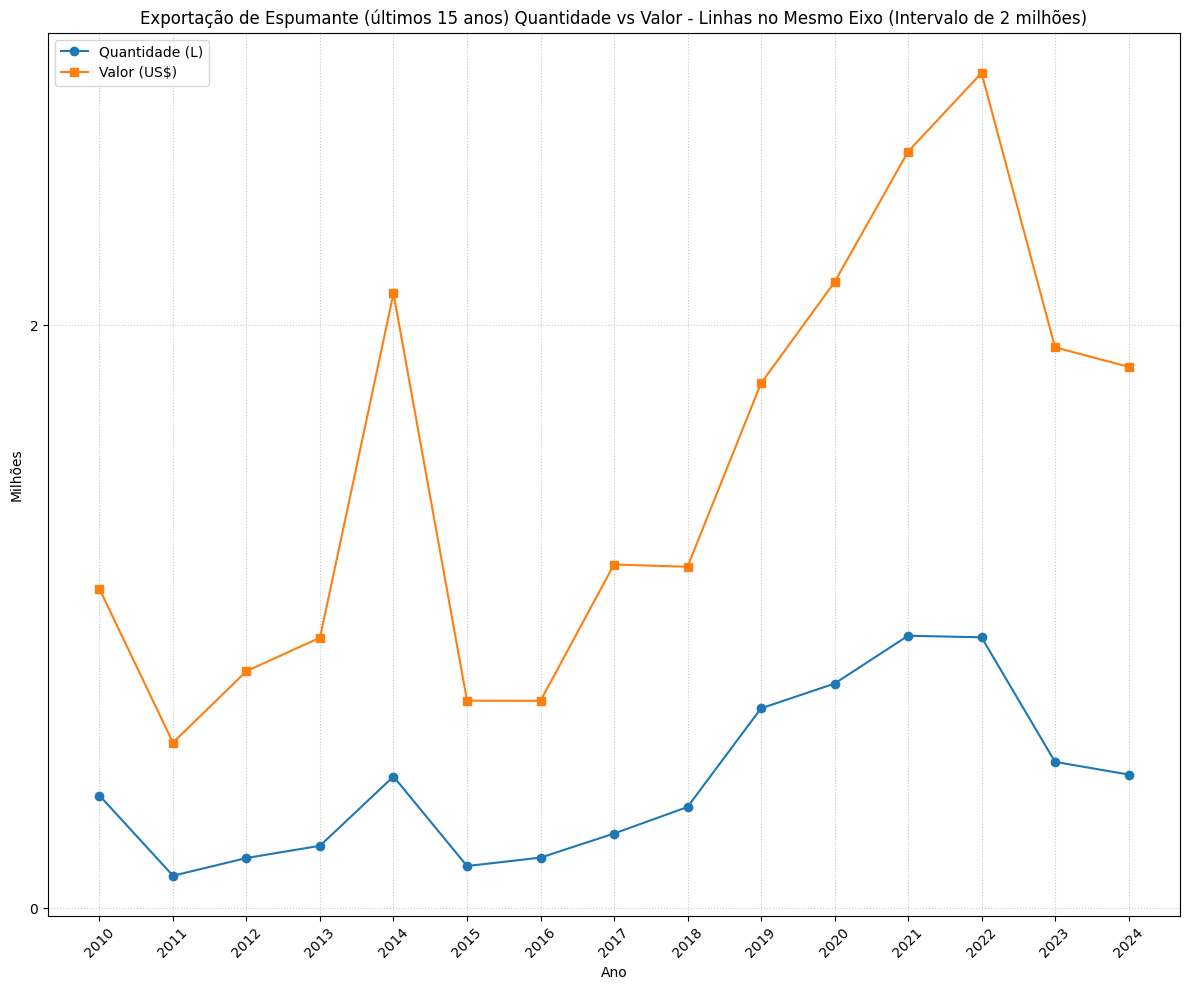

In [48]:
gerar_graficos_por_ano(df_espumante, "Exportação de Espumante (últimos 15 anos)")

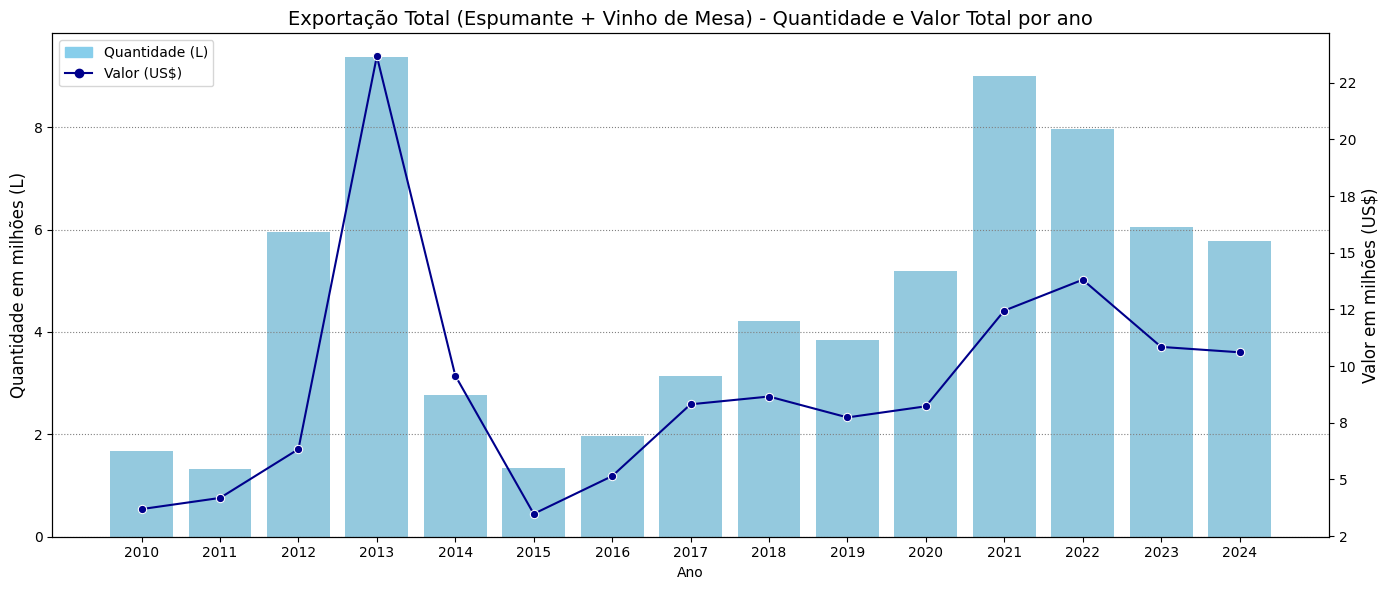

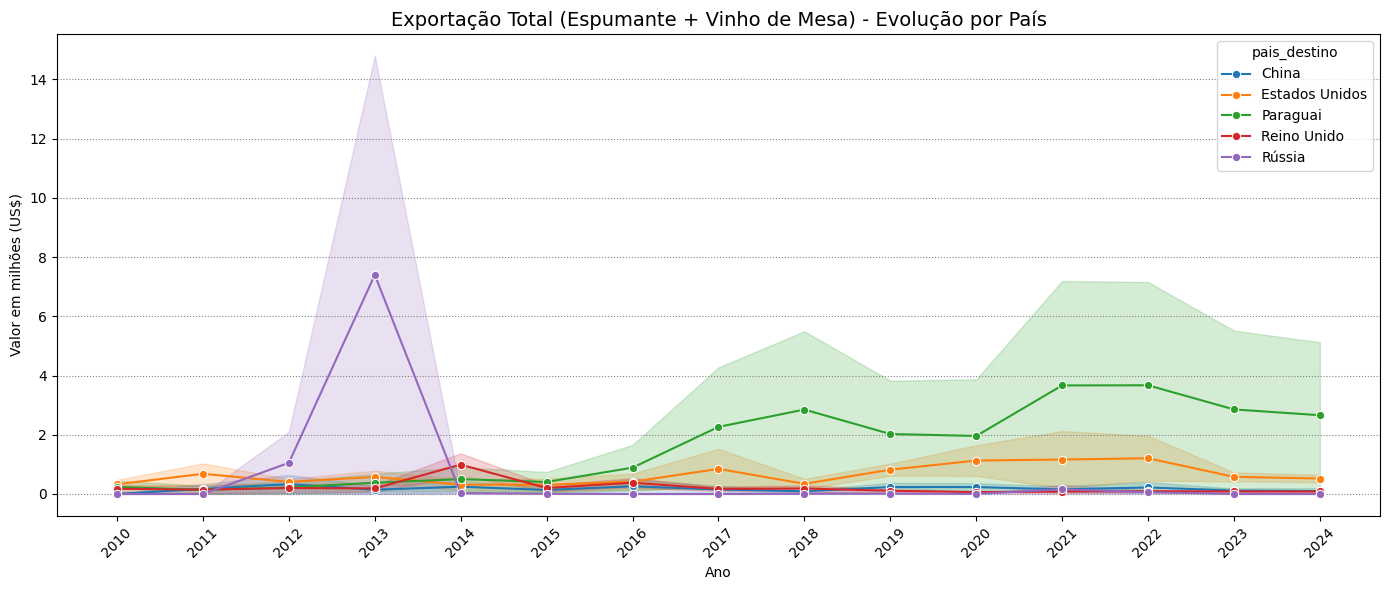

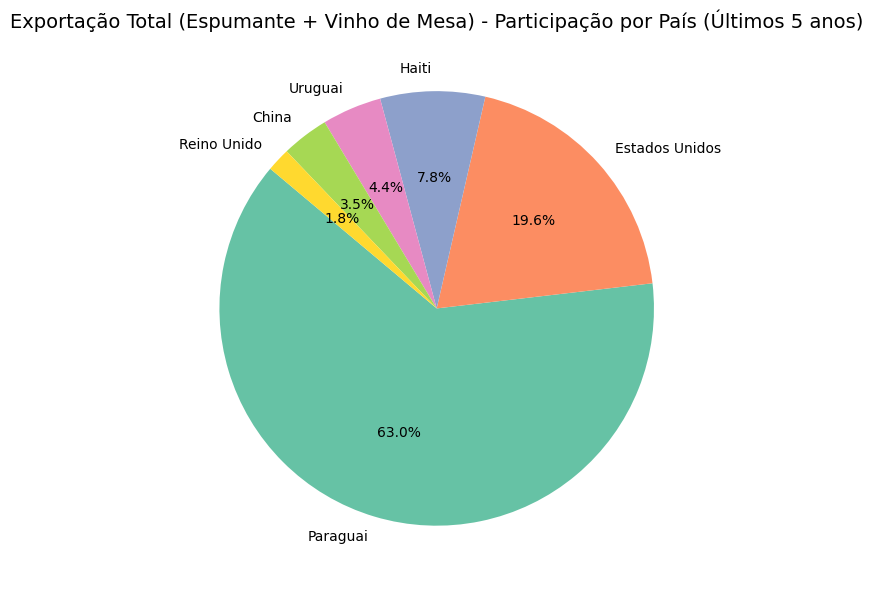

<ipython-input-45-9939e5d2f3b8>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=representatividade, x='representatividade_%', y='pais_destino', palette='magma')


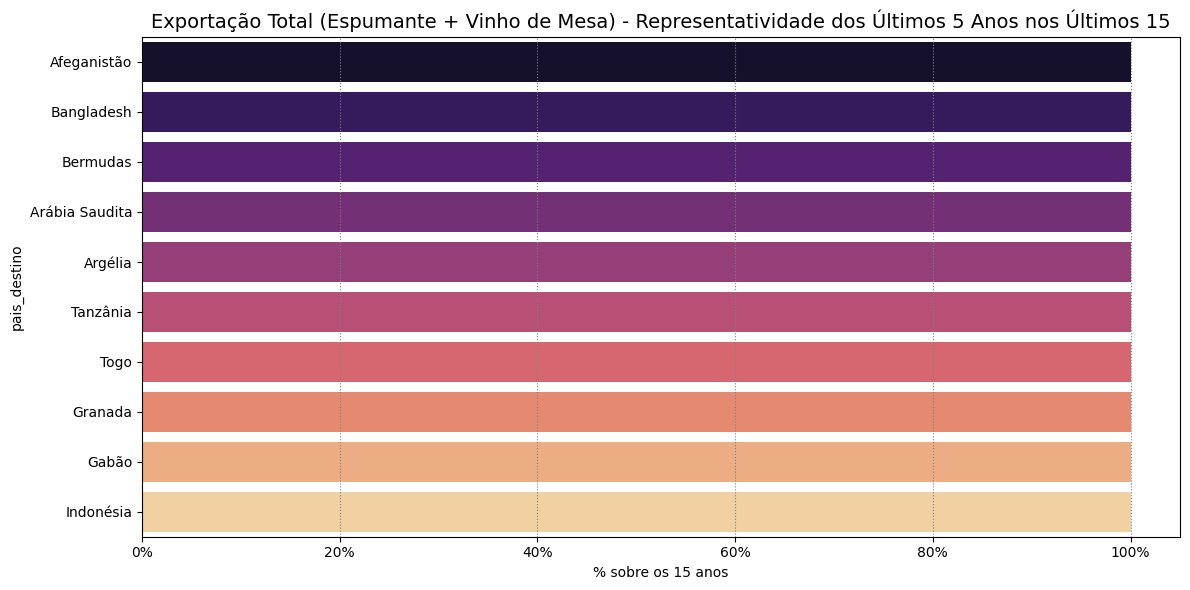

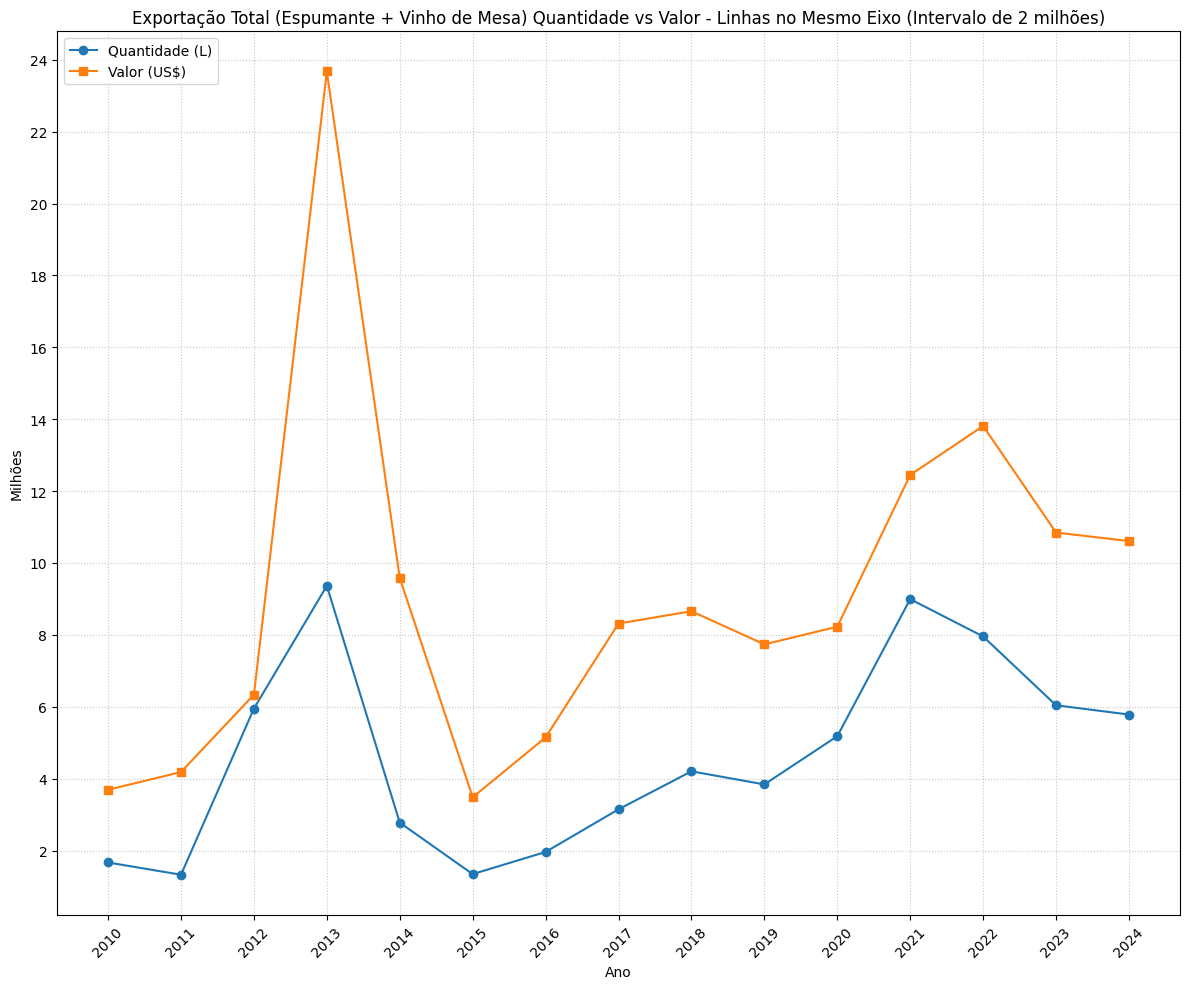

In [49]:
gerar_graficos_por_ano(df_total, "Exportação Total (Espumante + Vinho de Mesa)")

# Análises Avançadas de Exportação por País e Ano

Os gráficos abaixo visam aprofundar a compreensão da exportação de vinhos brasileiros nos últimos 15 anos com foco em:

- Evolução percentual da participação dos países
- Crescimento percentual ano a ano por país
- Mapa de calor de preços médios por litro
- Análise cruzada de preço médio vs volume
- Dispersão e variação do valor por litro

**Fonte dos dados**: EMBRAPA. Centro Nacional de Pesquisa de Uva e Vinho. Sistema de Informações da Vitivinicultura Brasileira – VitiBrasil. Disponível em: http://vitibrasil.cnpuv.embrapa.br. Acesso em: 16 maio 2025.


###Gráfico Melhorado: Preço Médio com Linha de Média
Vamos adicionar uma linha de média ao gráfico de preço médio por litro.

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pandas as pd

def plot_preco_medio_por_litro(df, titulo='Preço Médio por Litro (US$)', xticks=None):
    # Limpeza
    df = df[df['quantidade_litros'] > 0]
    df = df.dropna(subset=['valor_usd', 'quantidade_litros'])
    df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
    df = df.dropna(subset=['ano'])

    # Preço médio
    df['preco_medio'] = df['valor_usd'] / df['quantidade_litros']
    df_medio_ano = df.groupby('ano')['preco_medio'].mean().reset_index()

    # Média geral
    media_geral = df_medio_ano['preco_medio'].mean()

    # Gráfico
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_medio_ano, x='ano', y='preco_medio', marker='o')
    plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média: US$ {media_geral:.2f}')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'US$ {x:.2f}'))
    plt.title(titulo)
    plt.xlabel('Ano')
    plt.ylabel('Preço Médio (US$)')
    if xticks is not None:
        plt.xticks(xticks, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


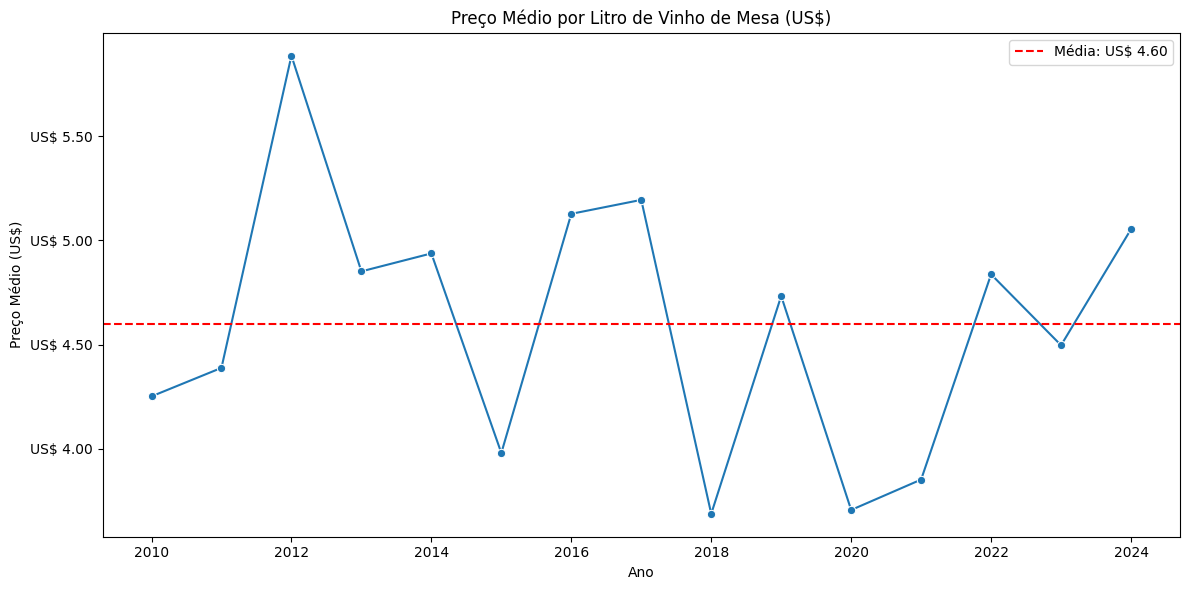

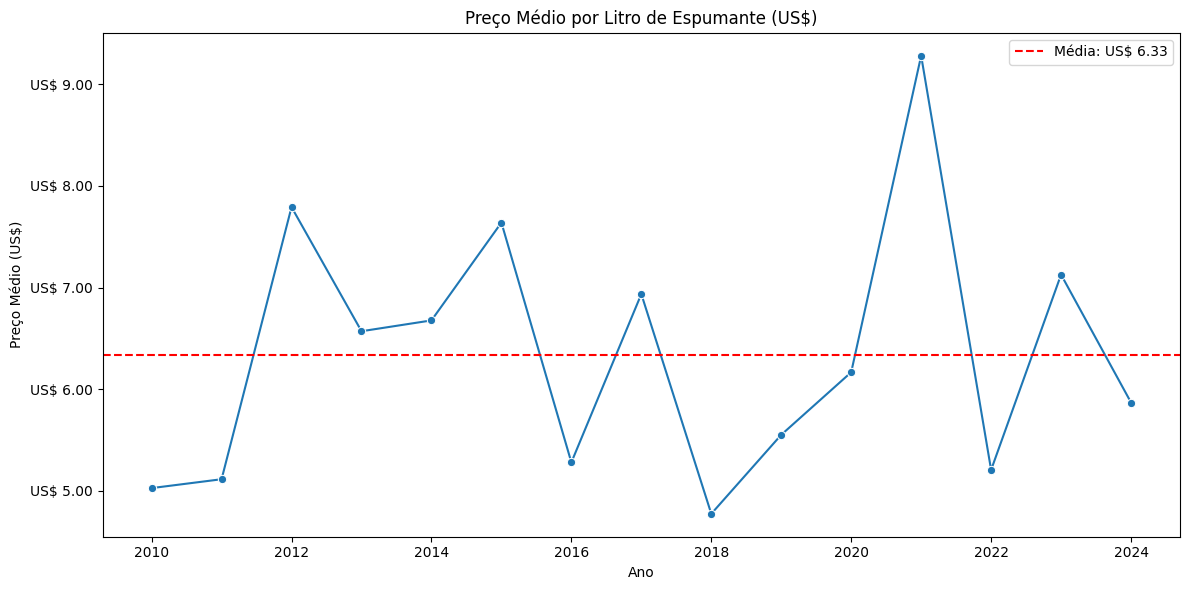

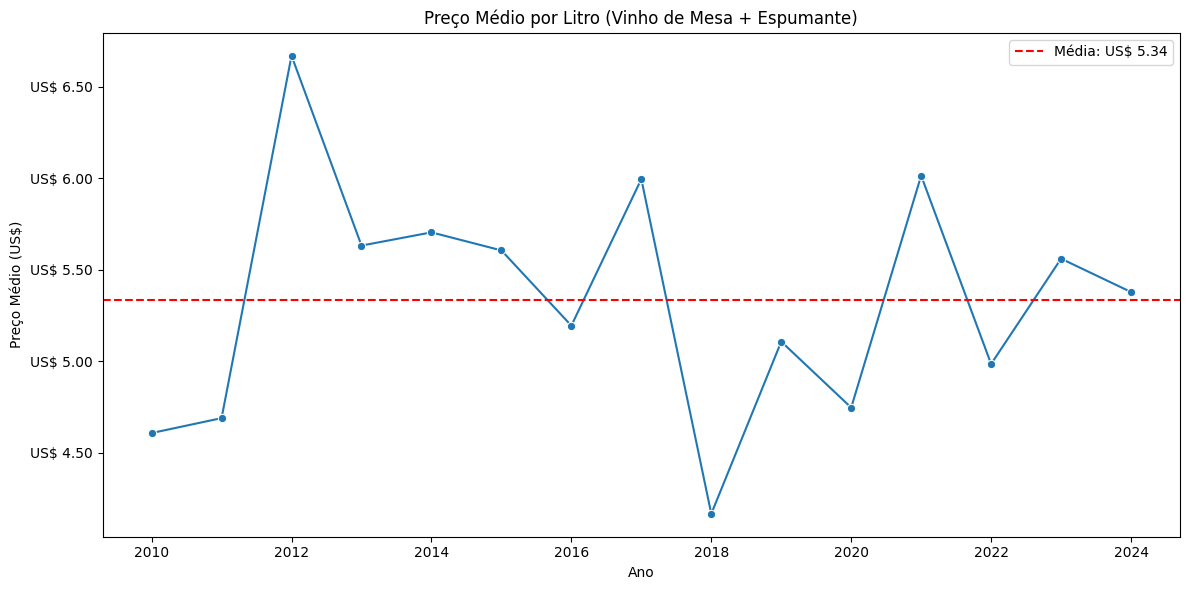

In [51]:
# Para vinho de mesa
plot_preco_medio_por_litro(df_vinho, titulo='Preço Médio por Litro de Vinho de Mesa (US$)')

# Para espumante
plot_preco_medio_por_litro(df_espumante, titulo='Preço Médio por Litro de Espumante (US$)')

# Para os dois combinados
df_combined = pd.concat([df_vinho, df_espumante])
plot_preco_medio_por_litro(df_combined, titulo='Preço Médio por Litro (Vinho de Mesa + Espumante)')

## Análises Avançadas de Exportação

Os gráficos abaixo visam aprofundar a compreensão da exportação de vinhos brasileiros nos últimos 15 anos com foco em:

- Evolução percentual da participação dos países
- Mapa de calor de preços médios por litro
- Dispersão e variação do valor por litro

### Evolução Percentual da Participação dos Países (Top 5)

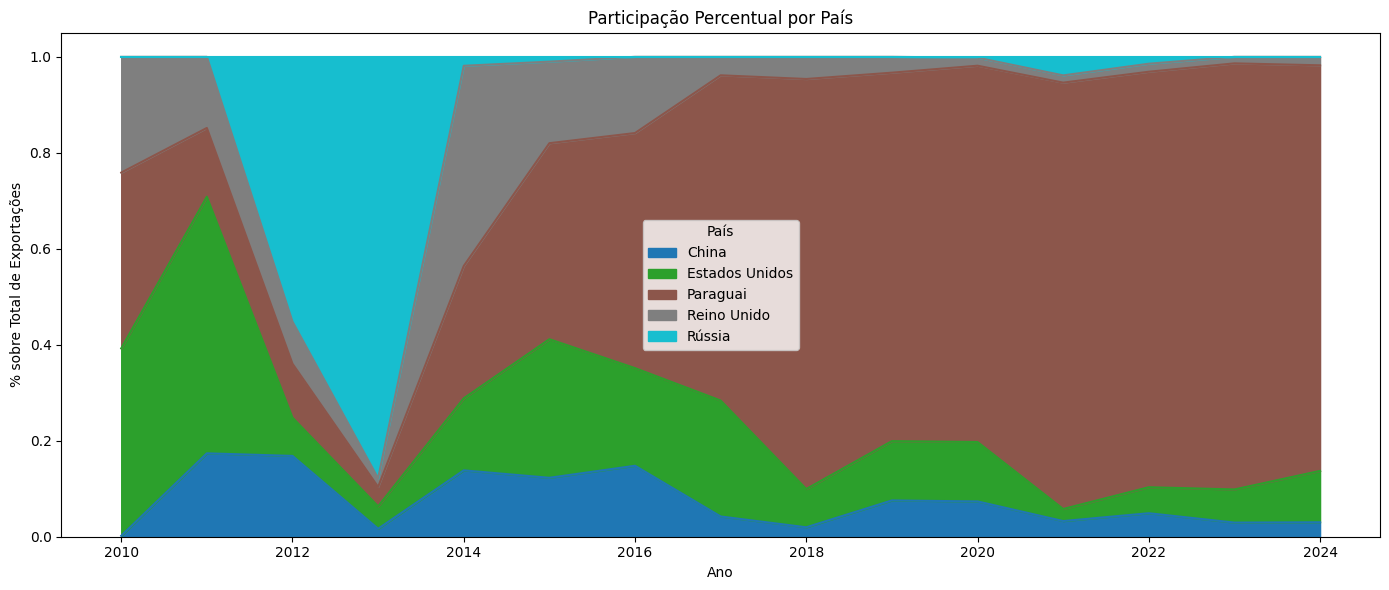

In [52]:
df = df_vinho.copy()
ultimos_anos = sorted(df['ano'].unique())[-15:]
df = df[df['ano'].isin(ultimos_anos)]

# Top 5 países
principais = df_top15.groupby('pais_destino')['valor_usd'].sum().nlargest(5).index
df_top = df[df['pais_destino'].isin(principais)]

pivot = df_top.pivot_table(index='ano', columns='pais_destino', values='valor_usd', aggfunc='sum')
percentual = pivot.divide(pivot.sum(axis=1), axis=0)

percentual.plot.area(figsize=(14,6), colormap='tab10', title='Participação Percentual por País')
plt.ylabel('% sobre Total de Exportações')
plt.xlabel('Ano')
plt.legend(title='País')
plt.tight_layout()
plt.show()

### Mapa de Calor - Preço Médio por Litro

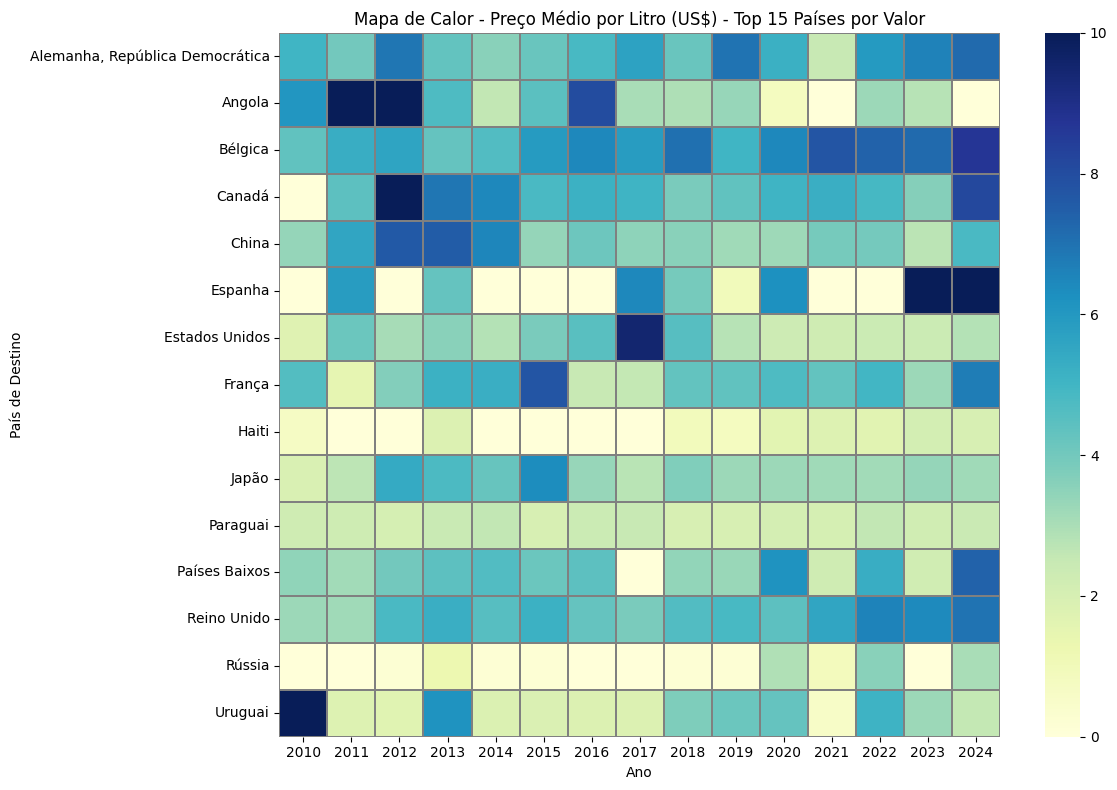

In [53]:
# df deve ser o mesmo usado no gráfico de barras
df = df_total.copy()

# Reutilize os países do top 15 por valor
agregados = df.groupby('pais_destino').agg({'valor_usd': 'sum'})
top_15_paises = agregados.sort_values(by='valor_usd', ascending=False).head(15).index

# Filtrar e calcular o preço médio
df['preco_medio'] = df['valor_usd'] / df['quantidade_litros'].replace(0, 1)
df_top15 = df[df['pais_destino'].isin(top_15_paises)]

# Criar matriz
matrix = df_top15.pivot_table(index='pais_destino', columns='ano', values='preco_medio')

# Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, cmap="YlGnBu", linewidths=0.3, linecolor='gray', vmin=0, vmax=10)
plt.title('Mapa de Calor - Preço Médio por Litro (US$) - Top 15 Países por Valor')
plt.xlabel('Ano')
plt.ylabel('País de Destino')
plt.tight_layout()
plt.show()

### Dispersão e Variação do Valor por Litro

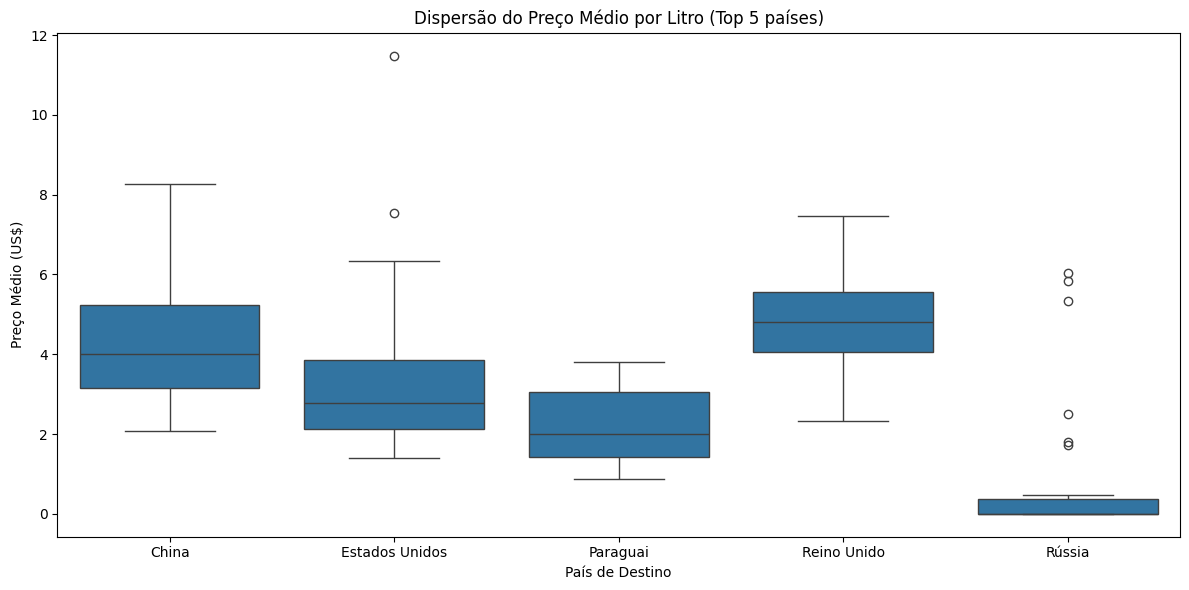

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['pais_destino'].isin(principais)], x='pais_destino', y='preco_medio')
plt.title('Dispersão do Preço Médio por Litro (Top 5 países)')
plt.ylabel('Preço Médio (US$)')
plt.xlabel('País de Destino')
plt.tight_layout()
plt.show()

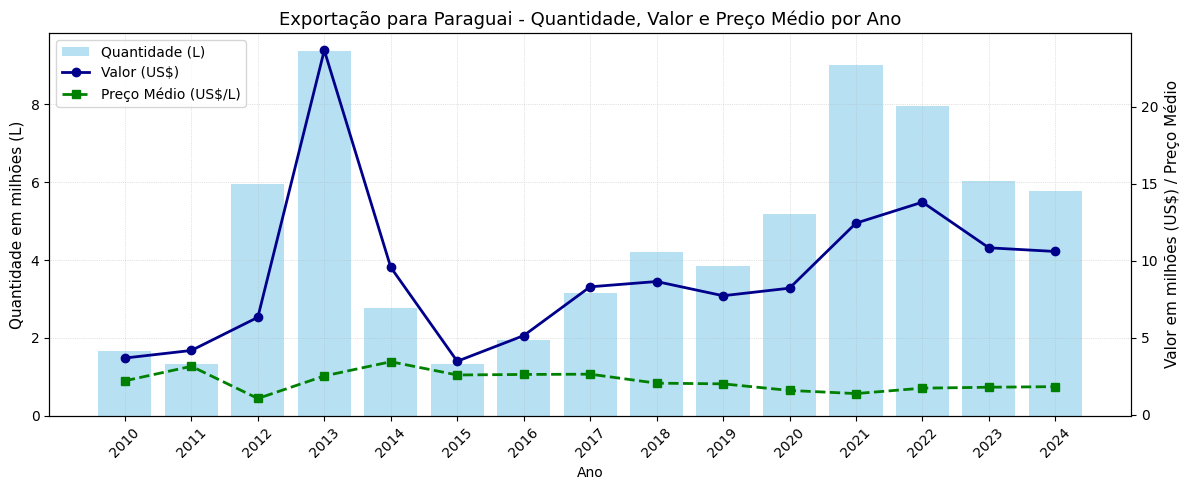

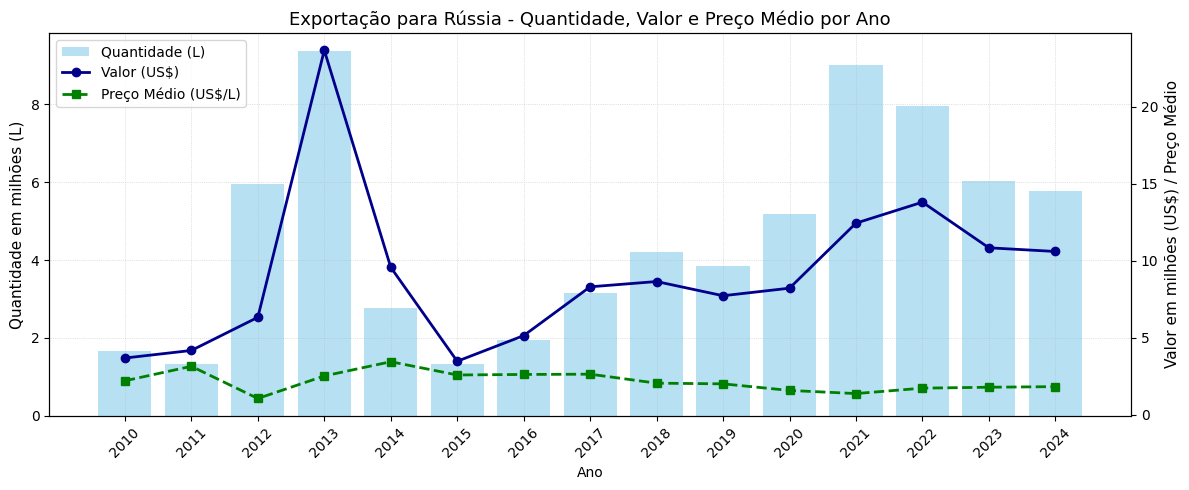

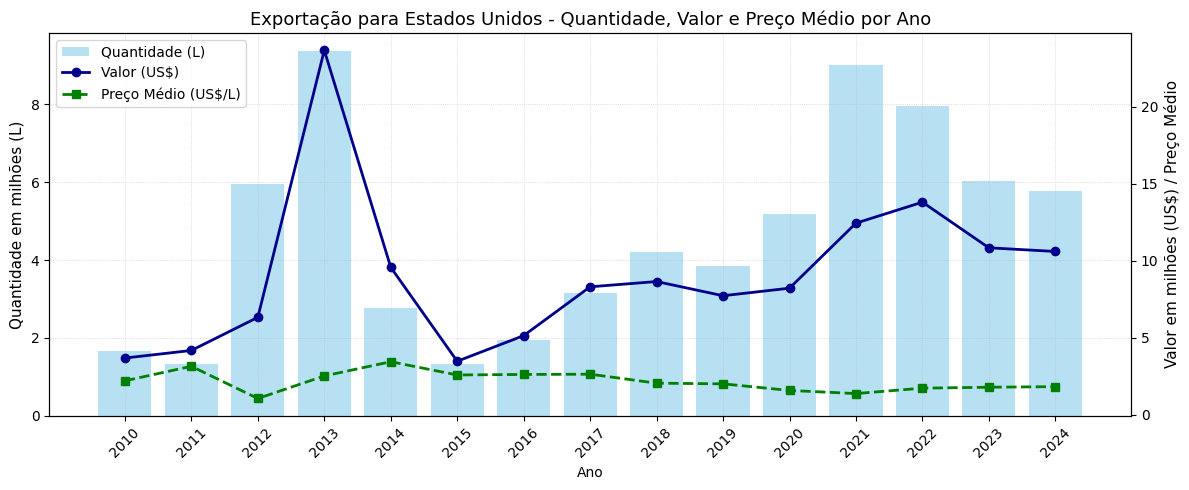

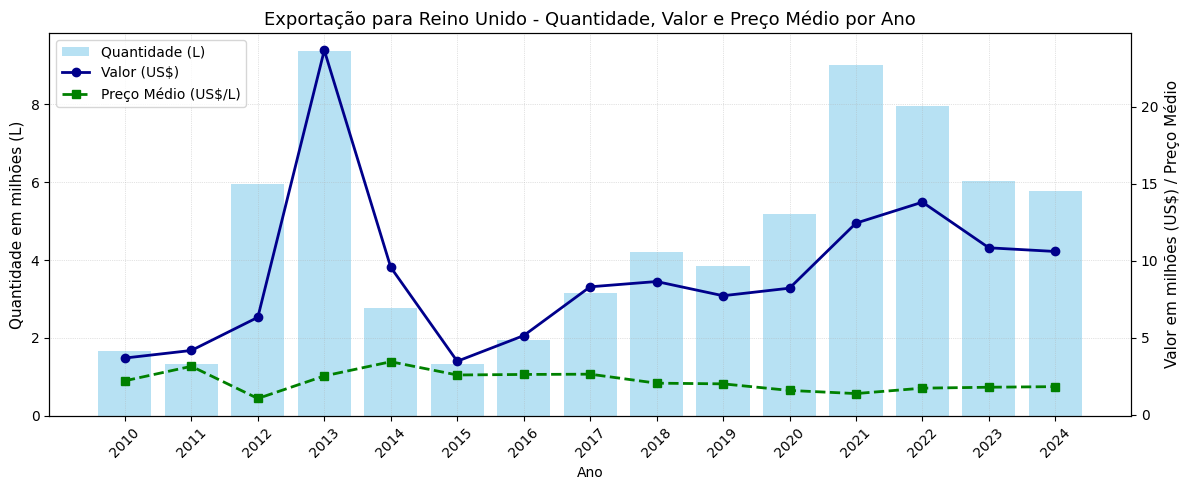

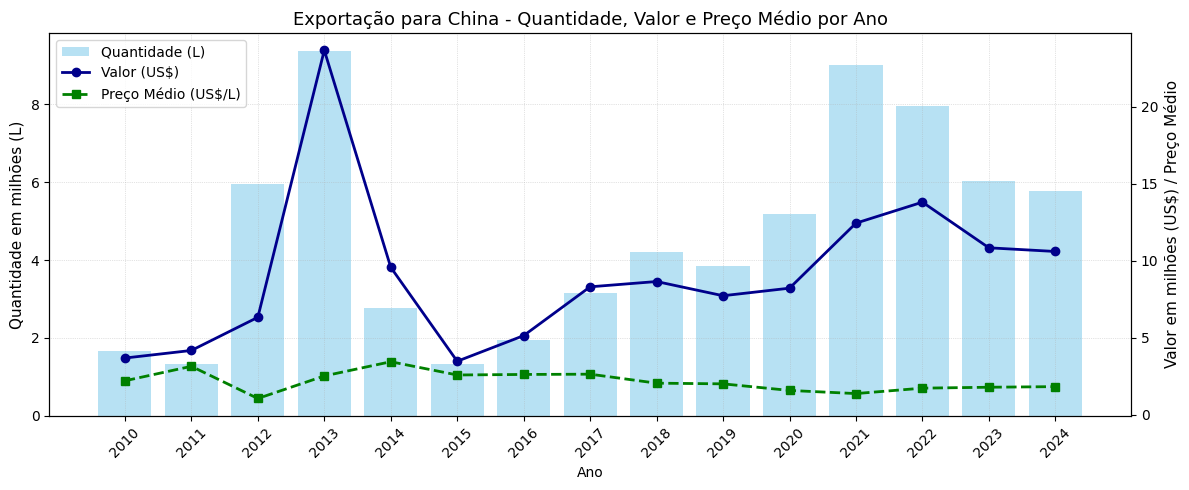

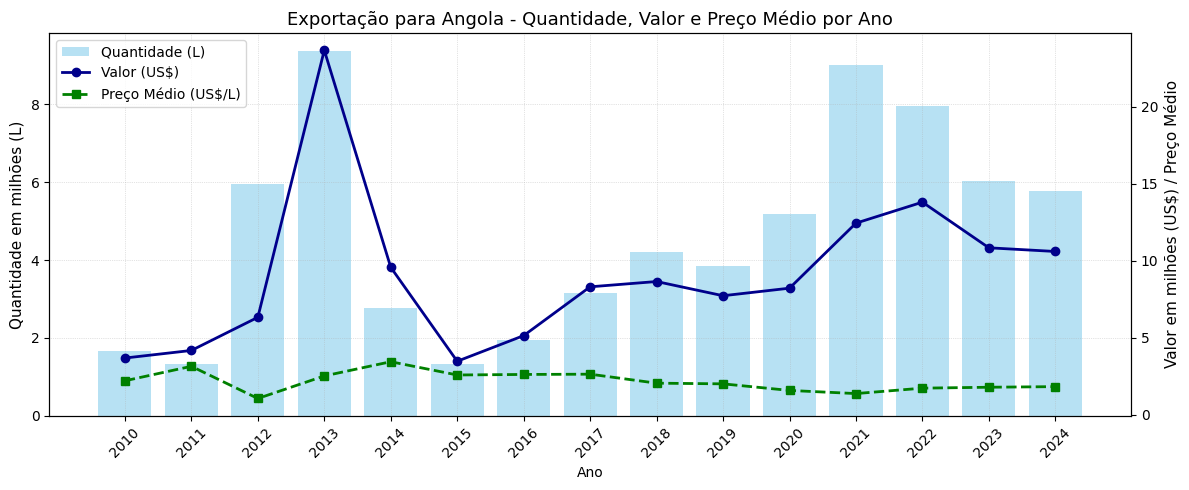

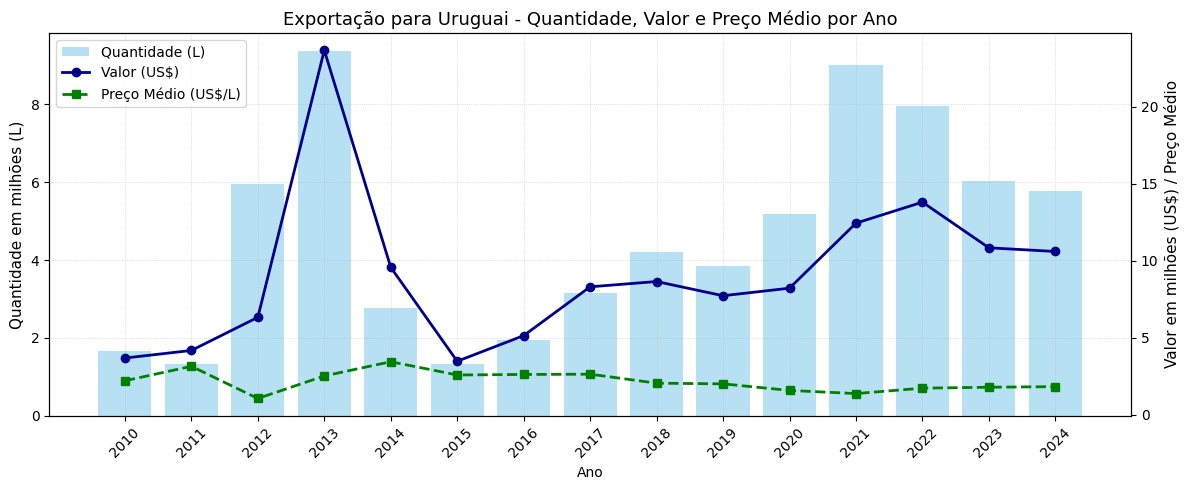

In [55]:
# Atualizando os gráficos para:
# - Exibir todos os anos no eixo x (sem pular)
# - Adicionar o preço médio por ano (linha verde)

paises_desejados = ['Paraguai', 'Rússia', 'Estados Unidos', 'Reino Unido', 'China','Angola', 'Uruguai']

for pais in paises_desejados:
    df_pais = df_total[df_total['pais_destino'] == pais]
    df_ano = df_total.groupby('ano').agg({
        'quantidade_litros': 'sum',
        'valor_usd': 'sum'
    }).reset_index()

    df_ano['preco_medio'] = df_ano['valor_usd'] / df_ano['quantidade_litros']
    anos = df_ano['ano'].astype(str)

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Barras: Quantidade
    ax1.bar(anos, df_ano['quantidade_litros'] / 1_000_000, color='skyblue', alpha=0.6, label='Quantidade (L)')
    ax1.set_ylabel('Quantidade em milhões (L)', fontsize=11)
    ax1.set_xlabel('Ano')
    ax1.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
    ax1.tick_params(axis='y')

    # Linha 1: Valor total
    ax2 = ax1.twinx()
    ax2.plot(anos, df_ano['valor_usd'] / 1_000_000, color='darkblue', marker='o', linewidth=2, label='Valor (US$)')

    # Linha 2: Preço médio
    ax2.plot(anos, df_ano['preco_medio'], color='green', marker='s', linewidth=2, linestyle='--', label='Preço Médio (US$/L)')
    ax2.set_ylabel('Valor em milhões (US$) / Preço Médio', fontsize=11)
    ax2.tick_params(axis='y')

    # Título e legenda combinada
    plt.title(f'Exportação para {pais} - Quantidade, Valor e Preço Médio por Ano', fontsize=13)
    ax1.set_xticks(range(len(anos)))
    ax1.set_xticklabels(anos, rotation=45)

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.tight_layout()
    plt.show()

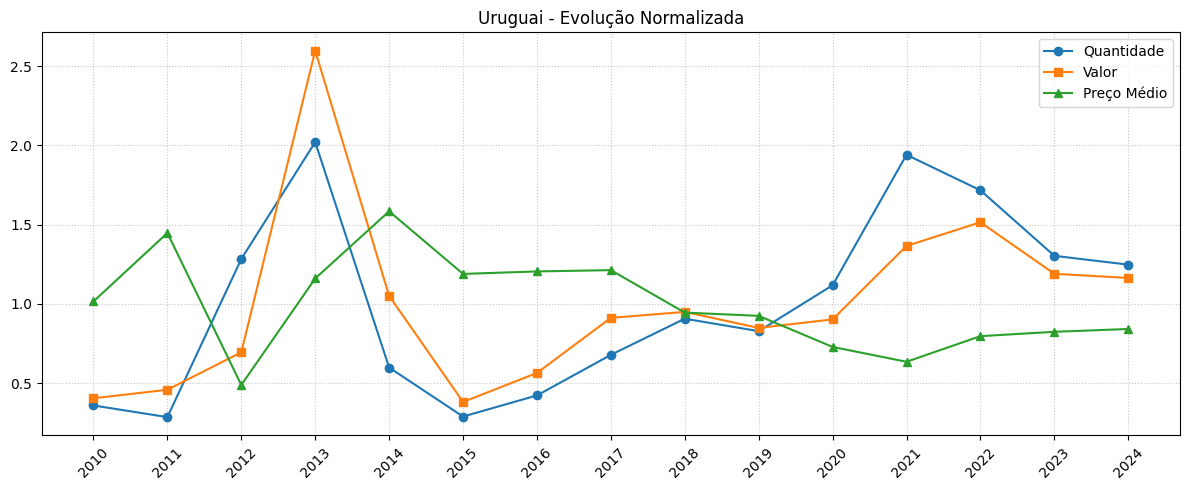

In [56]:
df_ano_norm = df_ano.copy()
df_ano_norm['quantidade_norm'] = df_ano['quantidade_litros'] / df_ano['quantidade_litros'].mean()
df_ano_norm['valor_norm'] = df_ano['valor_usd'] / df_ano['valor_usd'].mean()
df_ano_norm['preco_medio_norm'] = df_ano['preco_medio'] / df_ano['preco_medio'].mean()

plt.figure(figsize=(12, 5))
plt.plot(anos, df_ano_norm['quantidade_norm'], label='Quantidade', marker='o')
plt.plot(anos, df_ano_norm['valor_norm'], label='Valor', marker='s')
plt.plot(anos, df_ano_norm['preco_medio_norm'], label='Preço Médio', marker='^')
plt.title(f'{pais} - Evolução Normalizada')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


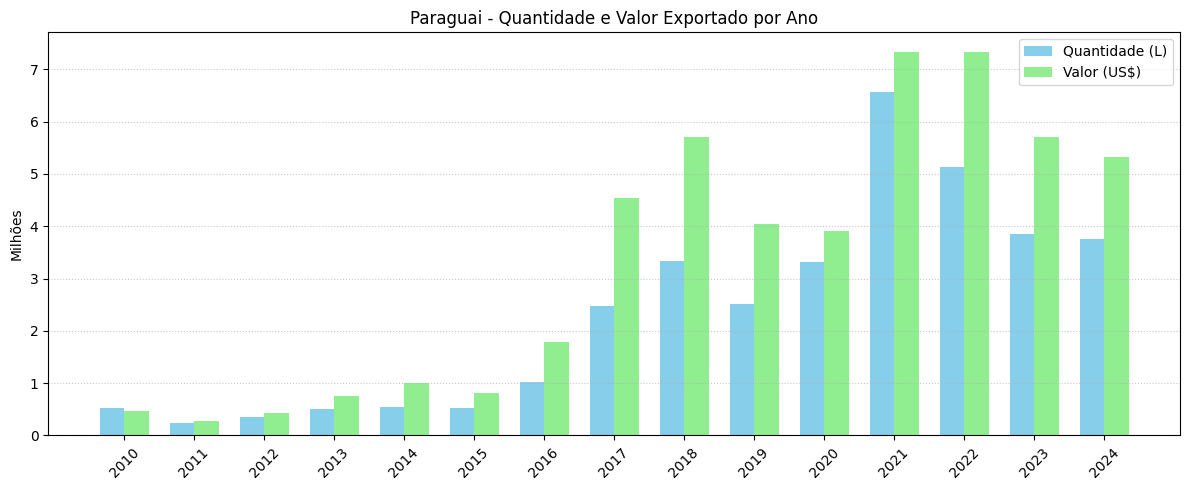

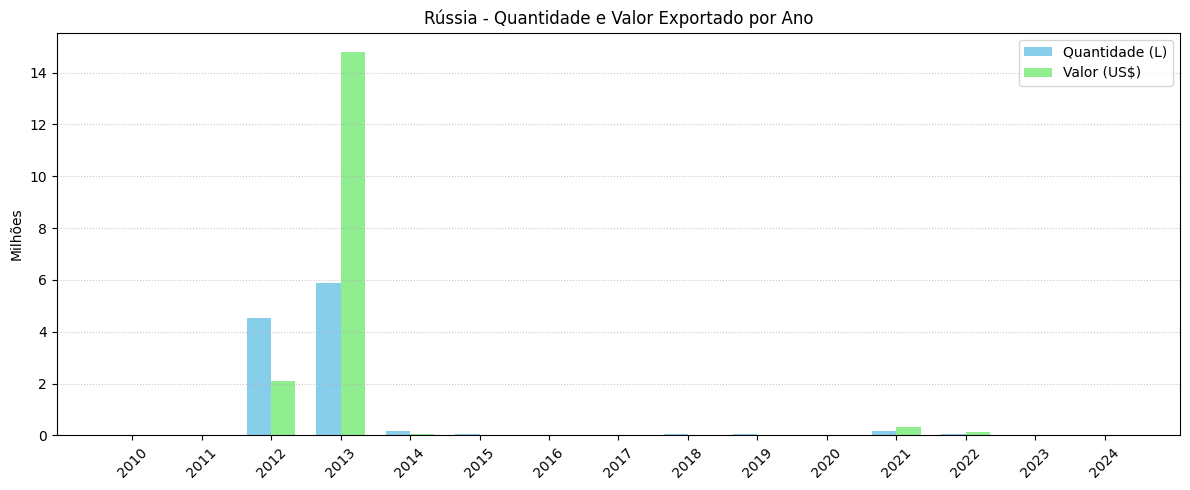

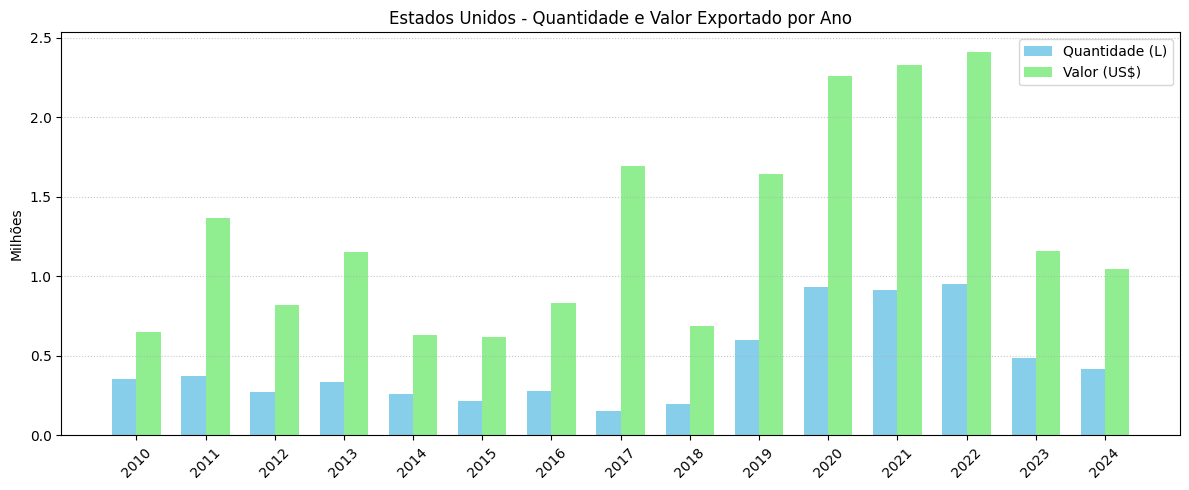

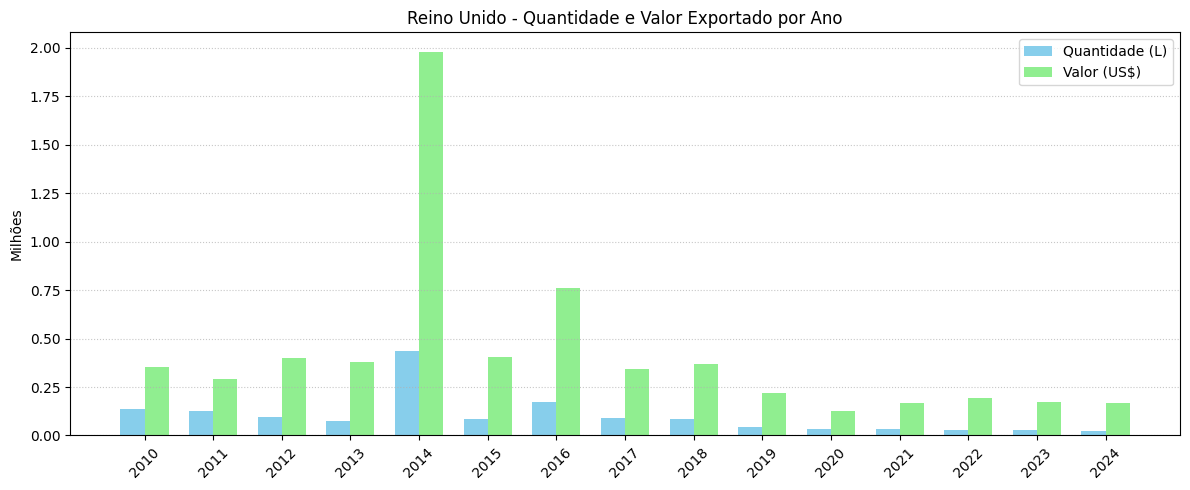

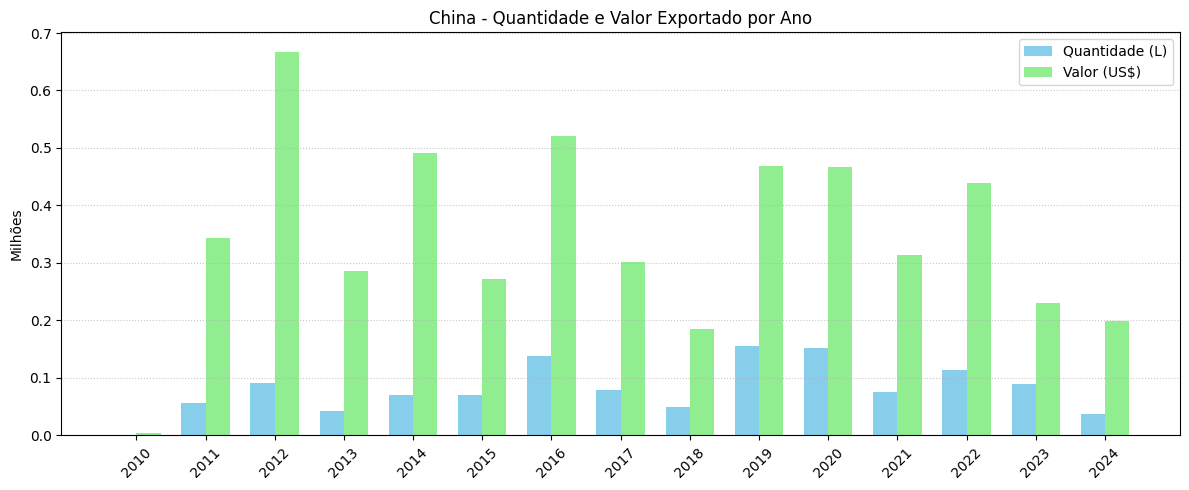

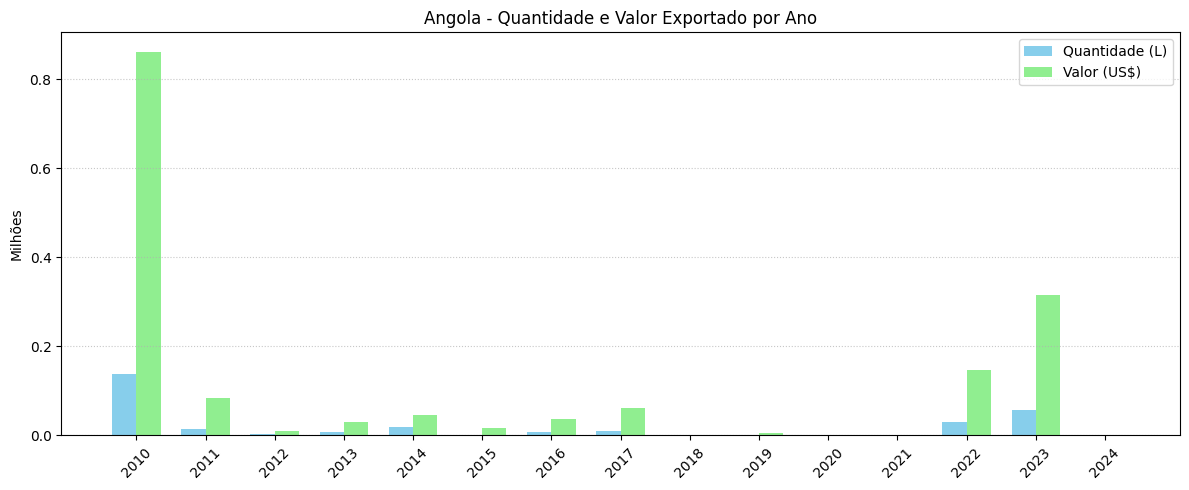

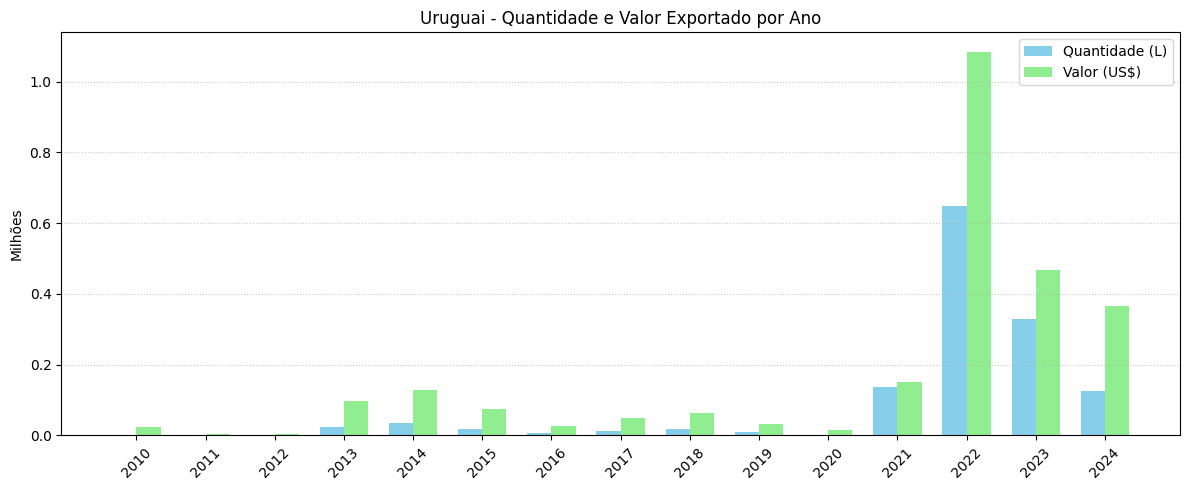

In [57]:
import numpy as np

for pais in paises_desejados:
    df_pais = df_total[df_total['pais_destino'] == pais]
    df_ano = df_pais.groupby('ano')[['quantidade_litros', 'valor_usd']].sum().reset_index()
    anos = df_ano['ano'].astype(str)
    x = np.arange(len(anos))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - width/2, df_ano['quantidade_litros'] / 1_000_000, width, label='Quantidade (L)', color='skyblue')
    ax.bar(x + width/2, df_ano['valor_usd'] / 1_000_000, width, label='Valor (US$)', color='lightgreen')

    ax.set_xticks(x)
    ax.set_xticklabels(anos, rotation=45)
    ax.set_ylabel('Milhões')
    ax.set_title(f'{pais} - Quantidade e Valor Exportado por Ano')
    ax.legend()
    ax.grid(True, axis='y', linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()


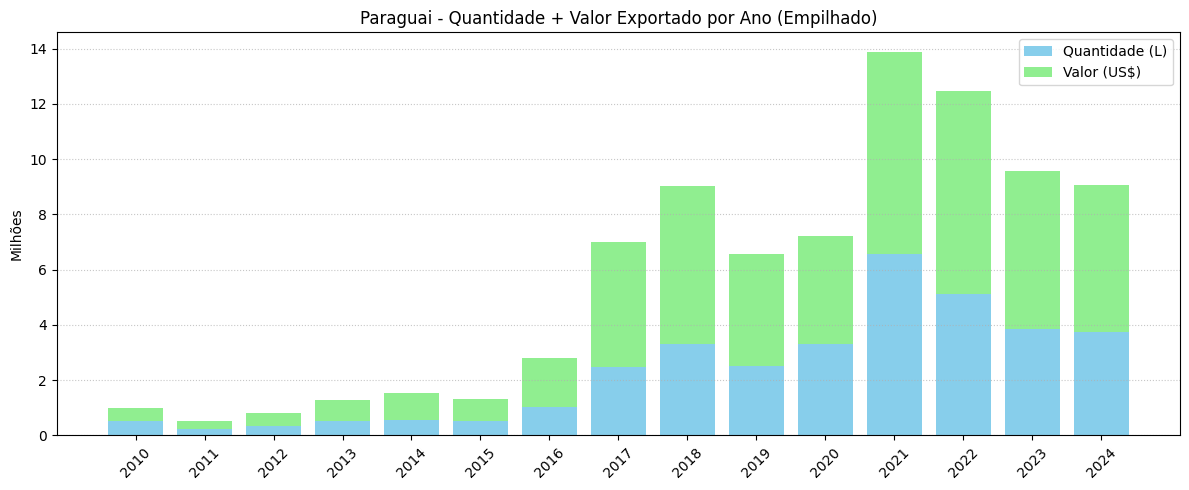

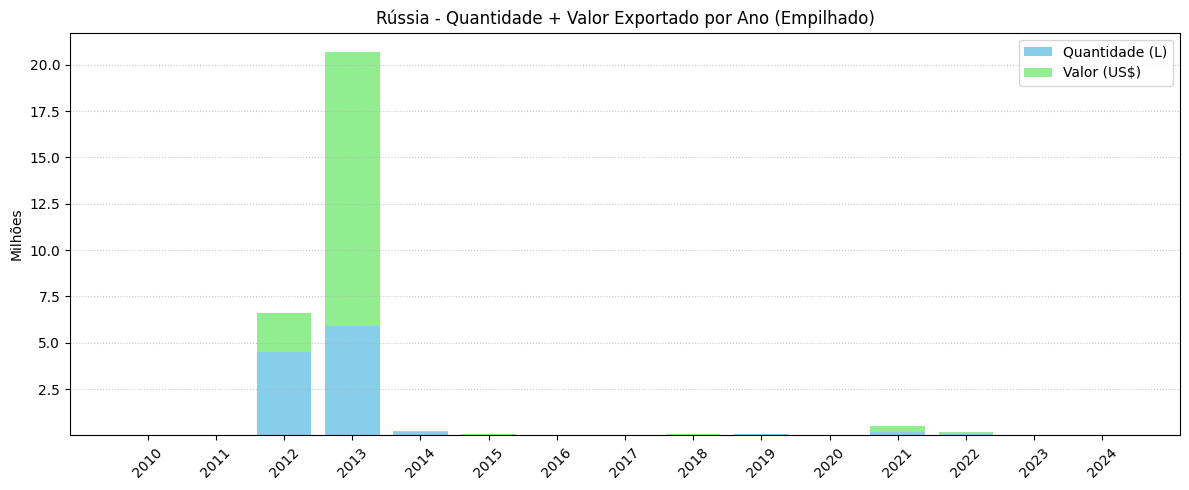

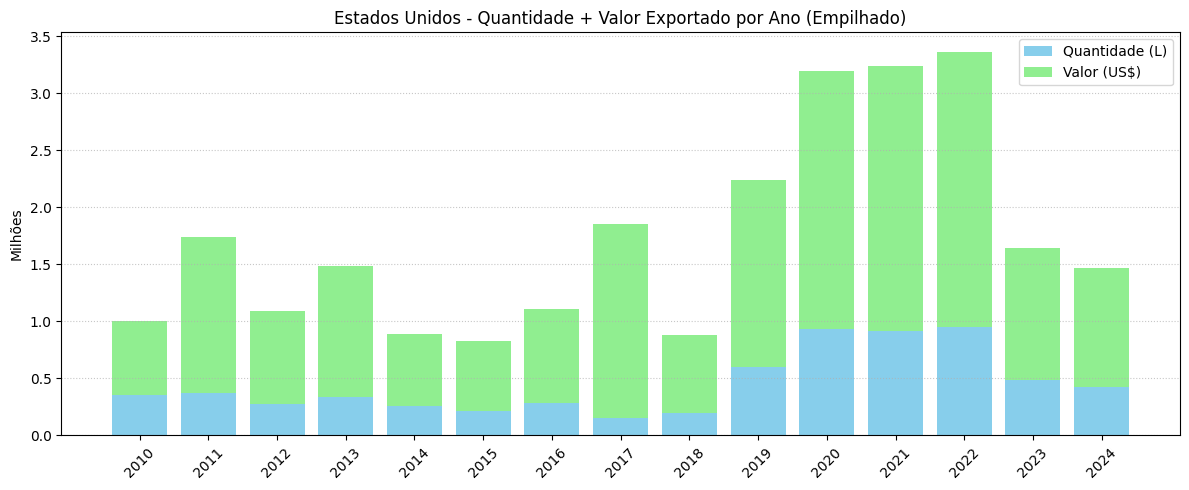

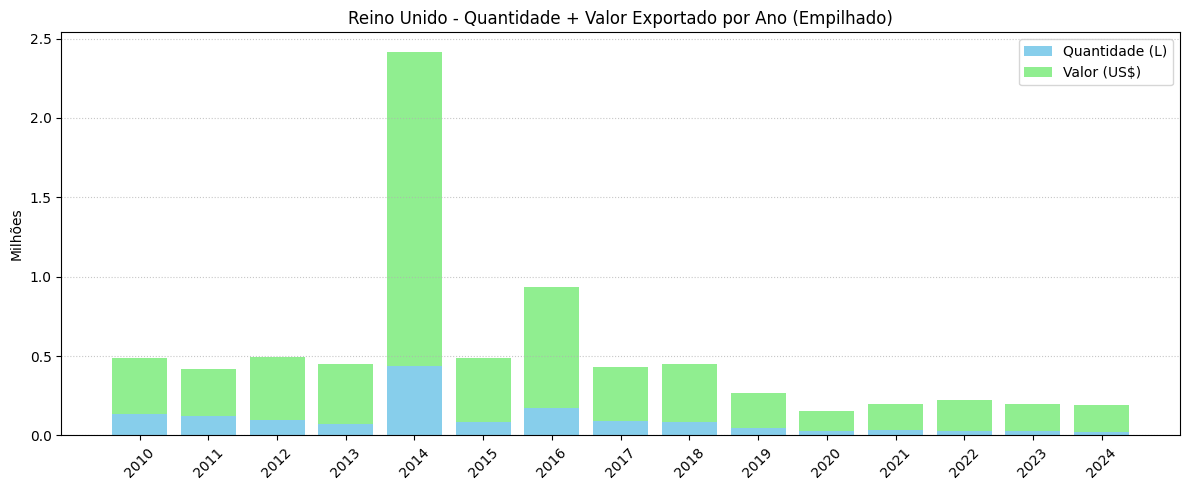

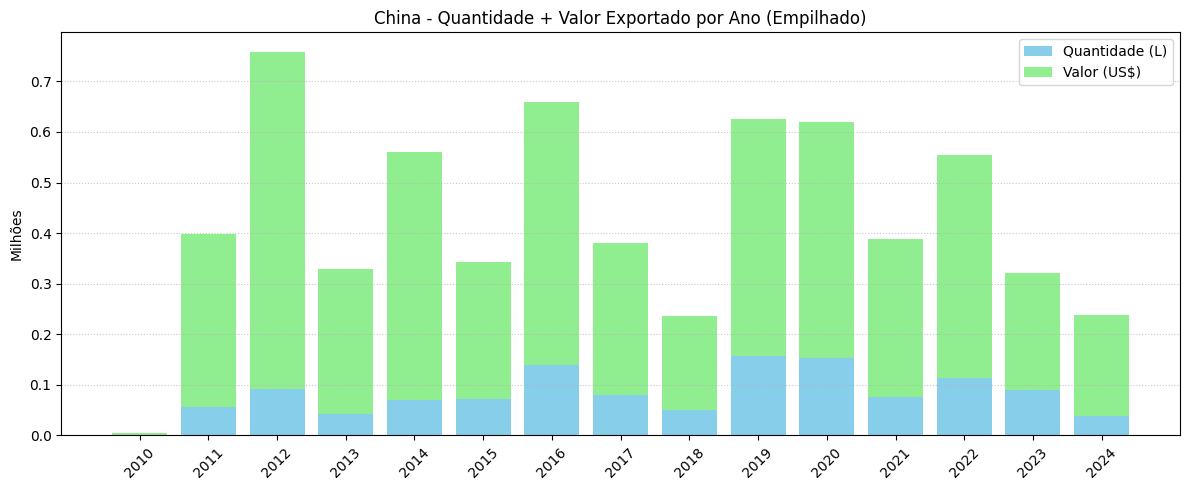

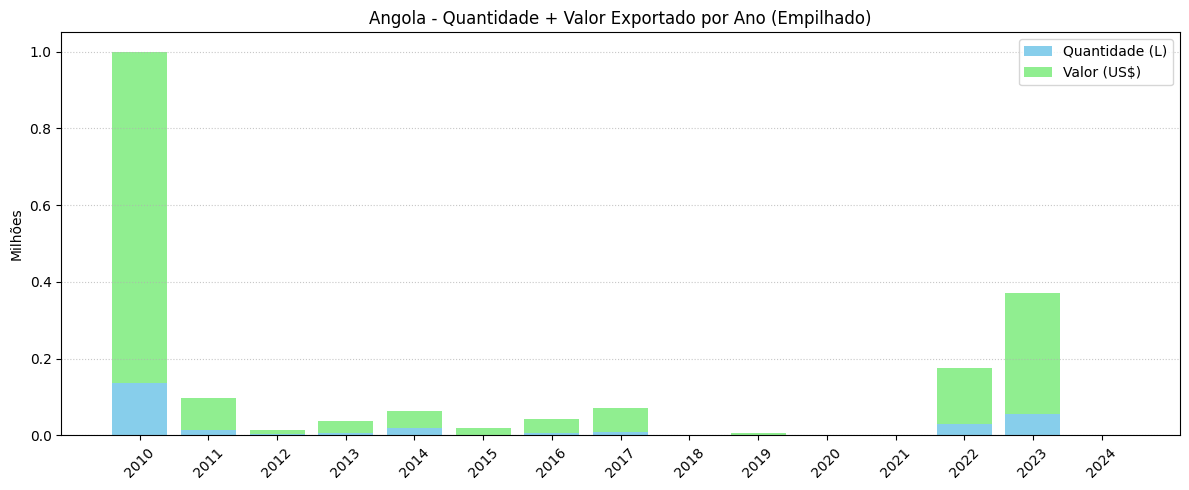

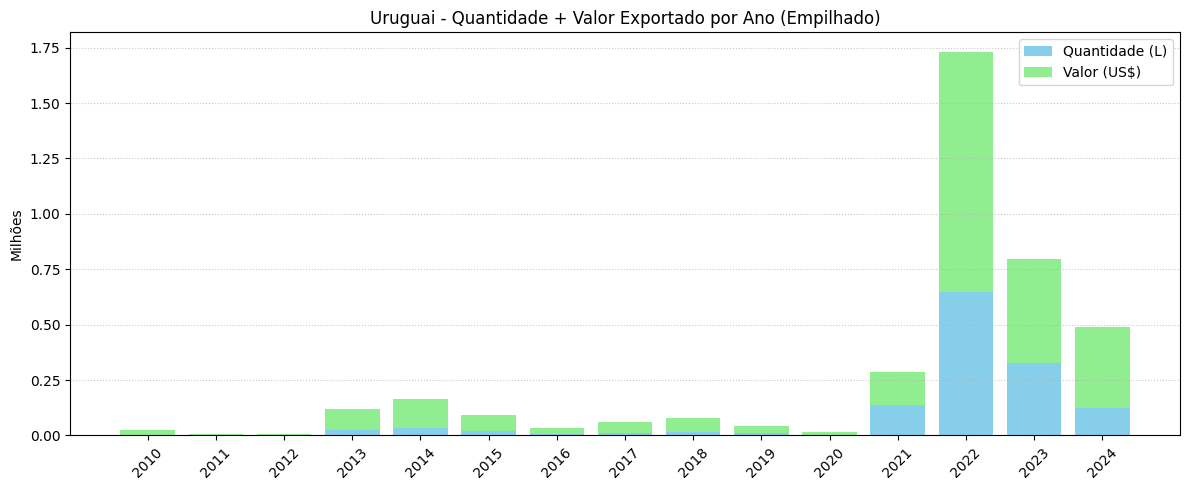

In [58]:
for pais in paises_desejados:
    df_pais = df_total[df_total['pais_destino'] == pais]
    df_ano = df_pais.groupby('ano')[['quantidade_litros', 'valor_usd']].sum().reset_index()
    anos = df_ano['ano'].astype(str)

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(anos, df_ano['quantidade_litros'] / 1_000_000, label='Quantidade (L)', color='skyblue')
    ax.bar(anos, df_ano['valor_usd'] / 1_000_000, bottom=df_ano['quantidade_litros'] / 1_000_000,
           label='Valor (US$)', color='lightgreen')

    ax.set_ylabel('Milhões')
    ax.set_title(f'{pais} - Quantidade + Valor Exportado por Ano (Empilhado)')
    ax.legend()
    ax.grid(True, axis='y', linestyle=':', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


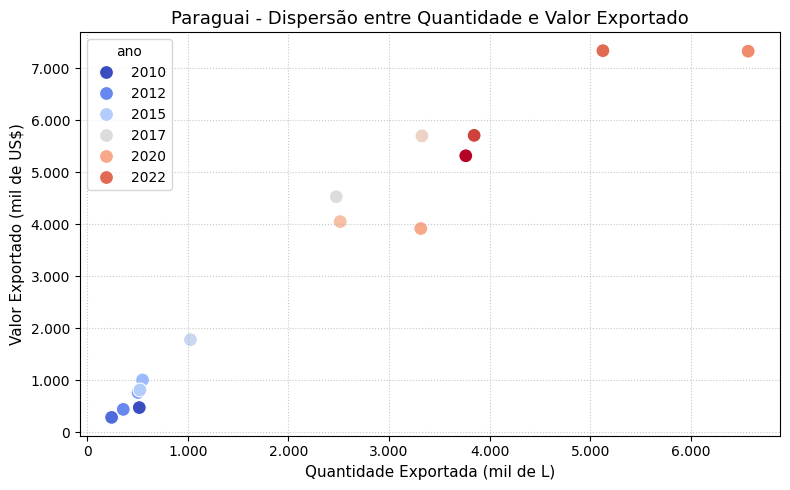

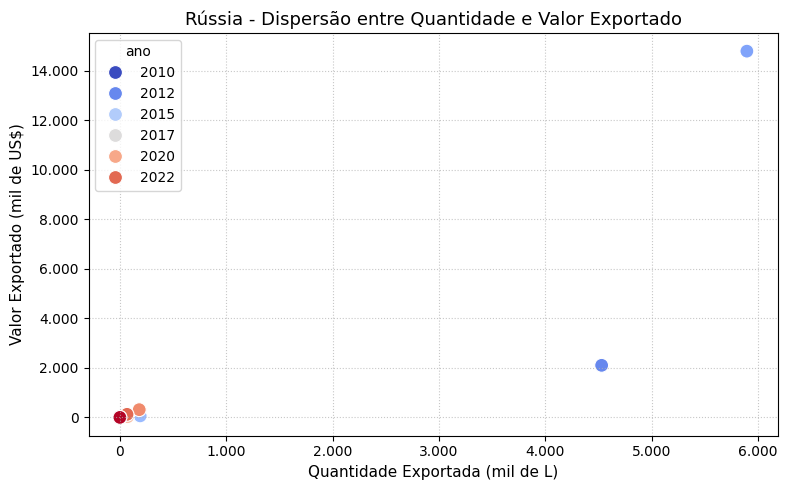

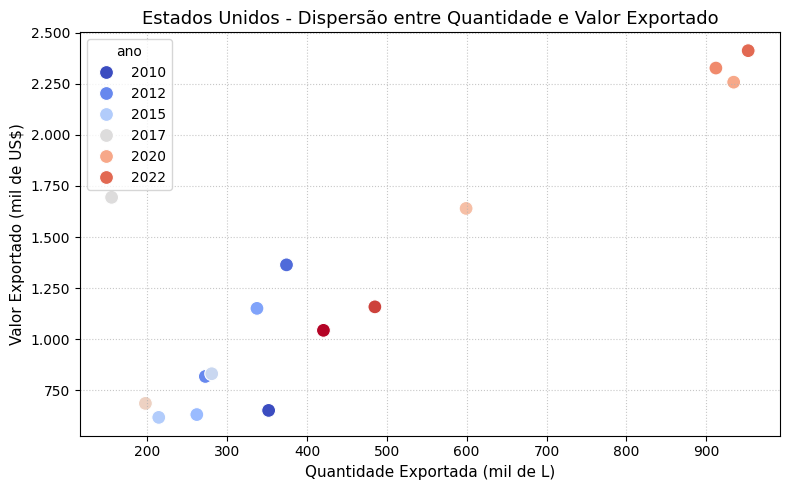

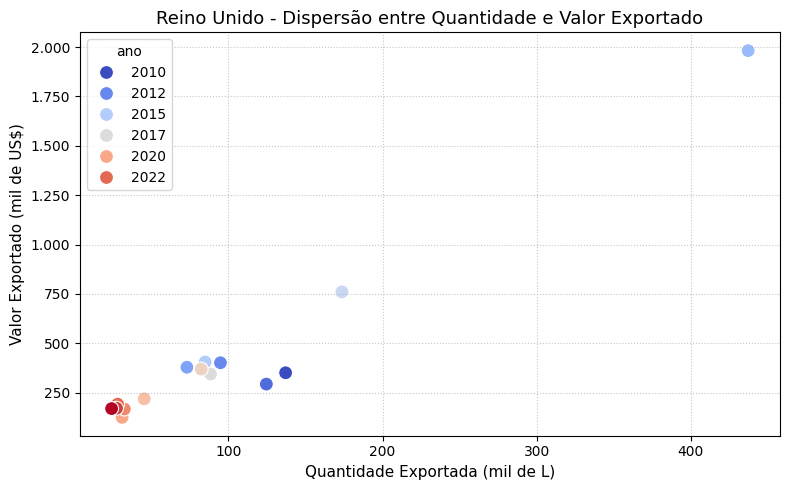

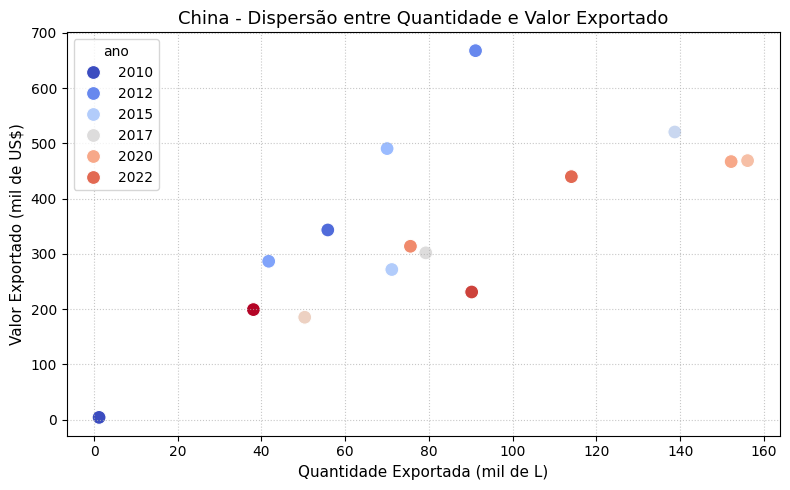

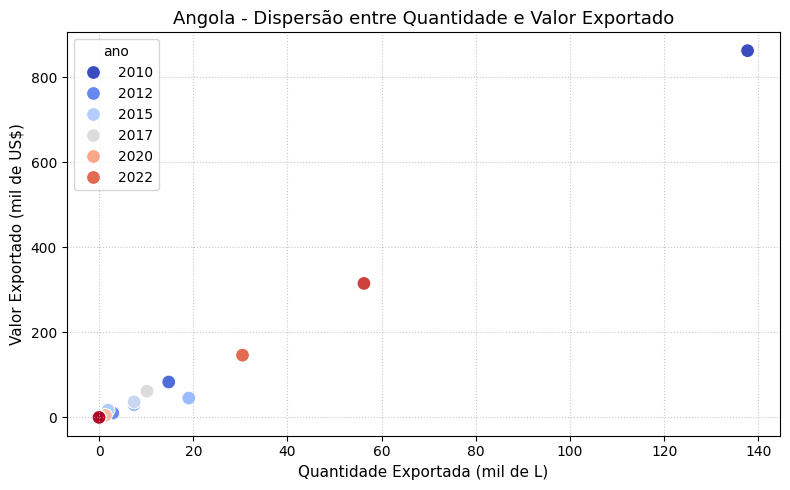

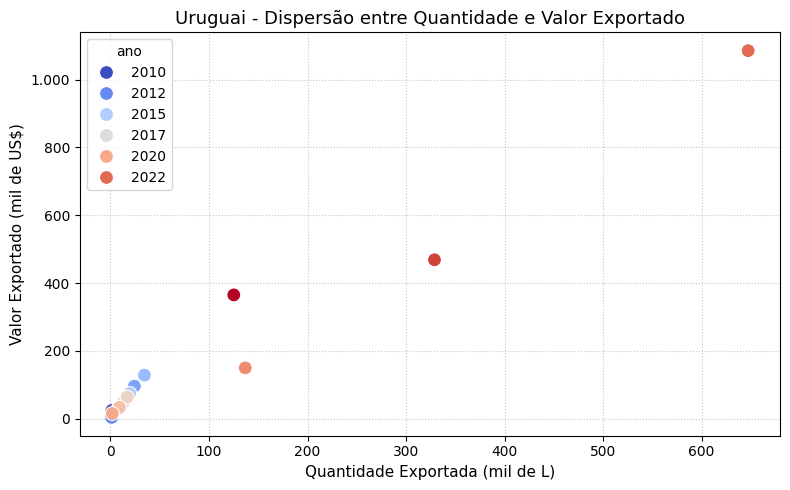

In [59]:
for pais in paises_desejados:
    df_pais = df_total[df_total['pais_destino'] == pais]
    df_ano = df_pais.groupby('ano')[['quantidade_litros', 'valor_usd']].sum().reset_index()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_ano, x='quantidade_litros', y='valor_usd', hue='ano', palette='coolwarm', s=100)

    plt.xlabel('Quantidade Exportada (mil de L)', fontsize=11)
    plt.ylabel('Valor Exportado (mil de US$)', fontsize=11)
    plt.title(f'{pais} - Dispersão entre Quantidade e Valor Exportado', fontsize=13)

    # Formatação brasileira com ponto como milhar e vírgula como decimal
    formatador_br = lambda x, _: f'{x/1_000:,.0f}'.replace(',', 'v').replace('.', ',').replace('v', '.')

    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(formatador_br))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(formatador_br))

    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()


## Dados Externos (Simulados)
Aqui adicionamos dados simulados de fatores externos que influenciam o mercado:
- PIB per capita
- Índice de preços
- Avaliação média dos vinhos

> **Observação:** Estes dados são fictícios apenas para fins ilustrativos.

In [60]:
dados_externos = pd.DataFrame({
    'pais_destino': ['Estados Unidos', 'Reino Unido', 'China', 'Japão', 'Canadá'],
    'pib_per_capita': [65000, 42000, 10500, 40000, 45000],
    'indice_precos': [2.1, 1.8, 2.9, 0.7, 1.6],
    'avaliacao_media_vinho': [4.2, 4.1, 3.8, 4.3, 4.0]
})
dados_externos

pais_destino  pib_per_capita  indice_precos  avaliacao_media_vinho
0  Estados Unidos           65000            2.1                    4.2
1     Reino Unido           42000            1.8                    4.1
2           China           10500            2.9                    3.8
3           Japão           40000            0.7                    4.3
4          Canadá           45000            1.6                    4.0